In [2]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def approximation(points, m, start, stop):
    a = -2 * np.pi / (stop - start)
    b= 2 * np.pi * start / (stop - start)

    A = []
    B = []
    for i in range(m):
        sum_a=0
        sum_b=0
        for x, y in points:
            x_ = a * x + b
            sum_a += y * np.cos(i * x_)
            sum_b += y * np.sin(i * x_)
        A.append(2 / (len(points) + 1) * sum_a)
        B.append(2 / (len(points) + 1) * sum_b)

    def f(x):
        result = A[0] / 2
        x_ = a * x + b
        for i in range(1,m):
            result += A[i] * np.cos(i * x_)
            result += B[i] * np.sin(i * x_)
        return result

    return f

In [4]:
def approximation_cos_only(points, m, start, stop):
    a =- 2 * np.pi / (stop - start)
    b = 2 * np.pi * start /(stop - start)

    A = []
    for i in range(m):
        sum_a = 0
        for x, y in points:
            x_ = a * x + b
            sum_a += y * np.cos(i * x_)
        A.append(2 / (len(points) + 1) * sum_a)

    def f(x):
        result = A[0]/2
        x_ = a * x + b
        for i in range(1,m):
            result += A[i] * np.cos(i * x_)
        return result

    return f

In [5]:
START, STOP, N = -4 * np.pi, 4*np.pi, 500

def f_real(x):
    return np.exp(np.cos(x))

def range_evenly(start, stop, n: int):
    return np.linspace(start=start, stop=stop, num=n, dtype=np.longdouble)


x_real = range_evenly(START, STOP, N)
y_real = f_real(x_real)

In [6]:
def max_err(y):
    return max(abs(y-y_real))

def std_err(ys, k: int):
    s = sum([(y_r - y)**2 for y_r, y in zip(y_real, ys)])
    return 1/k * np.sqrt(s)

max_errors = []
std_errors = []

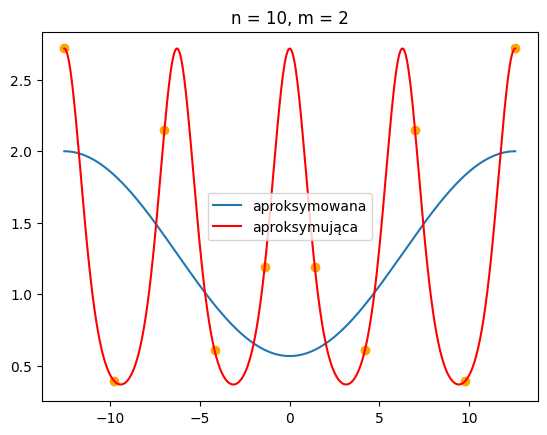

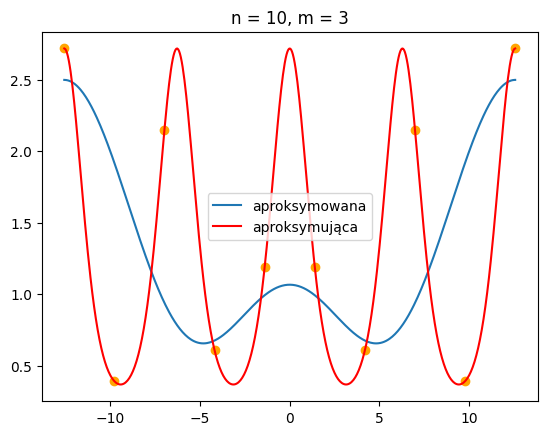

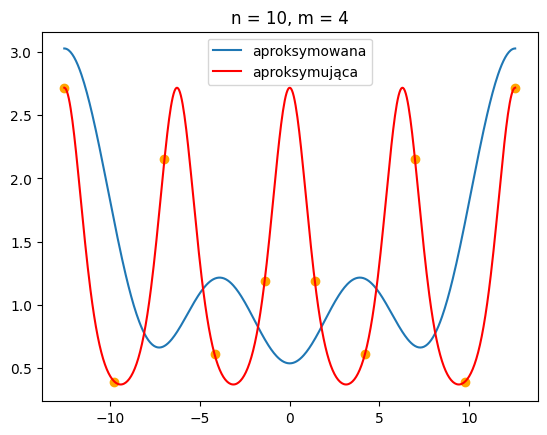

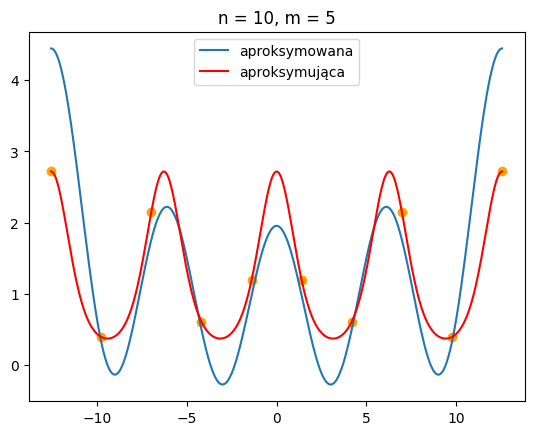

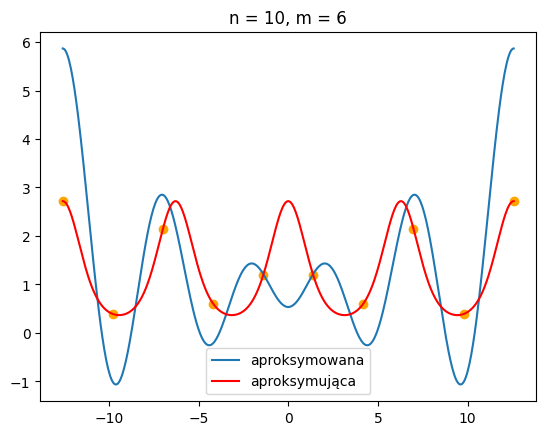

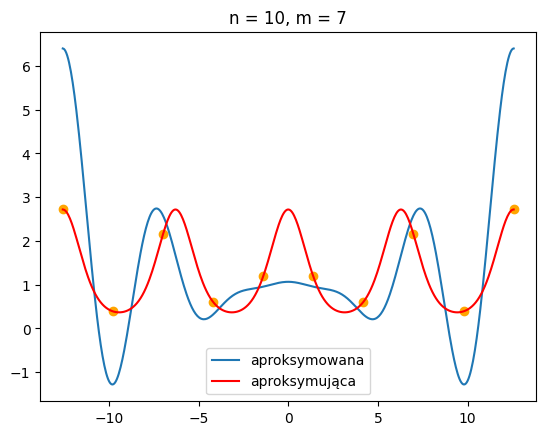

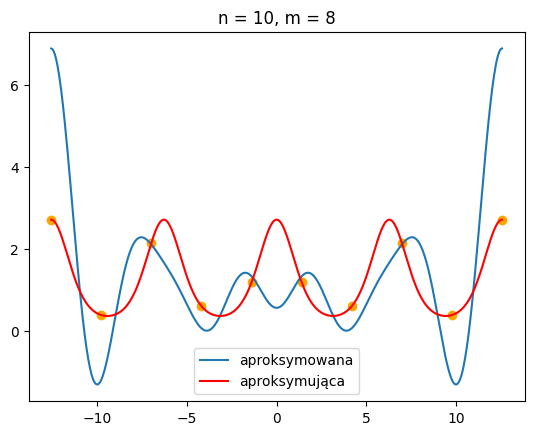

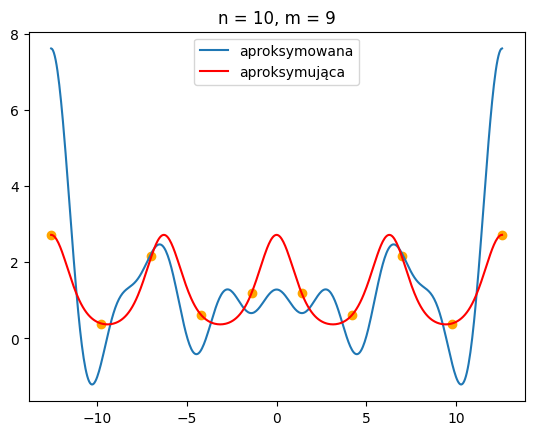

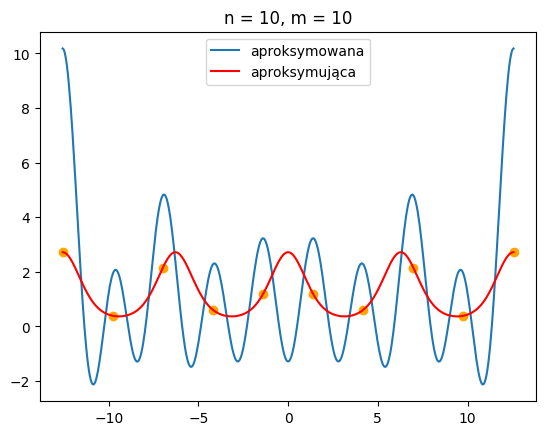

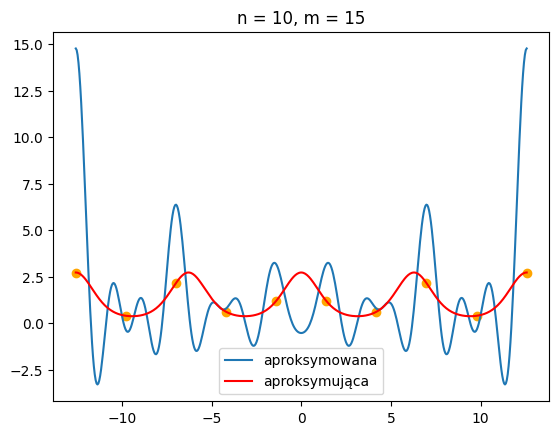

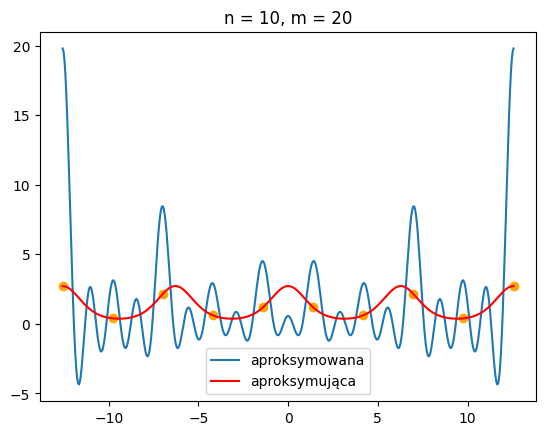

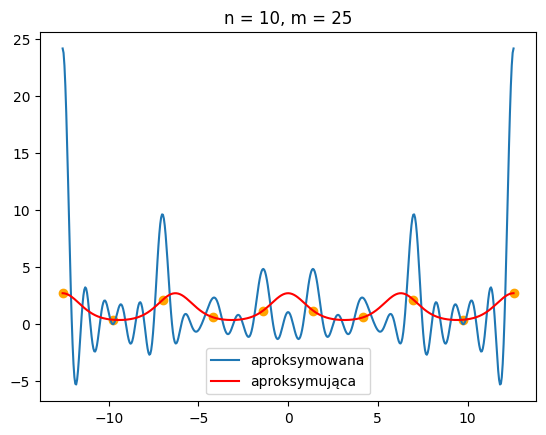

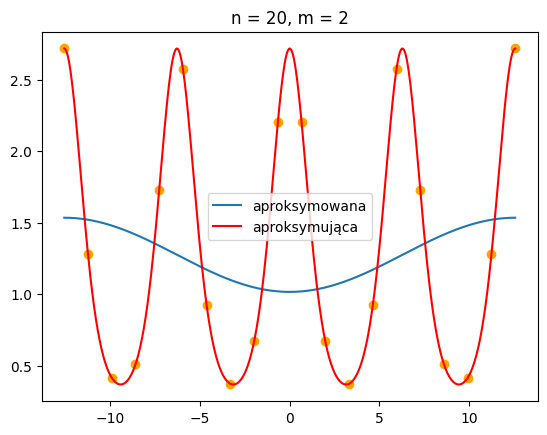

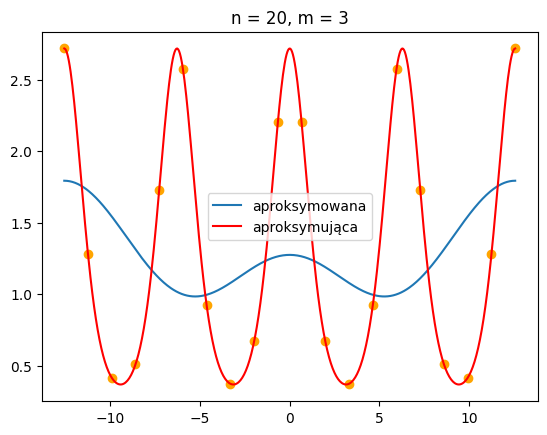

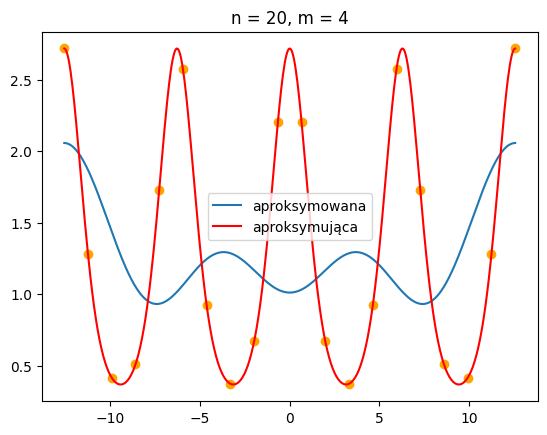

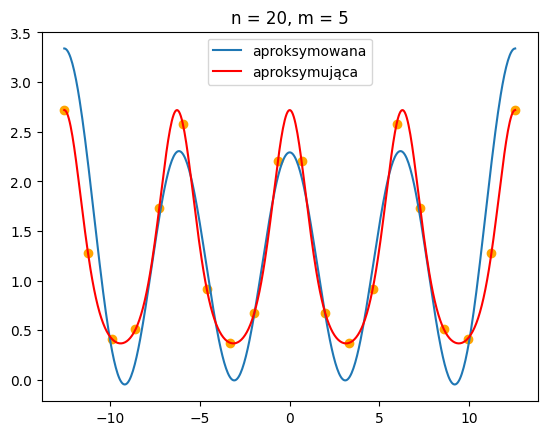

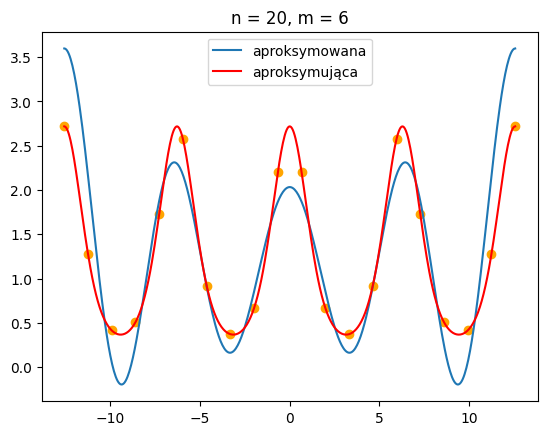

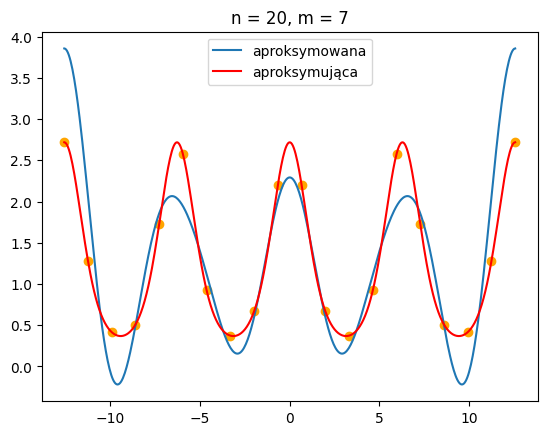

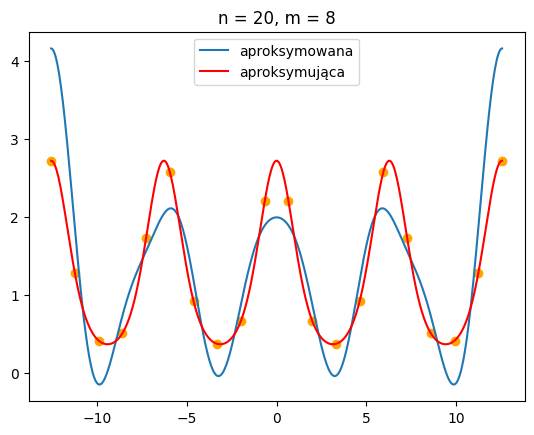

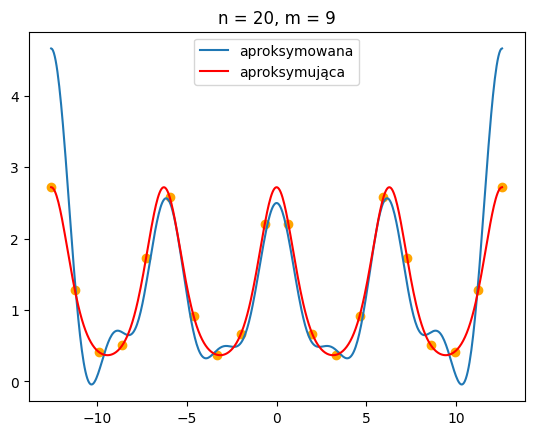

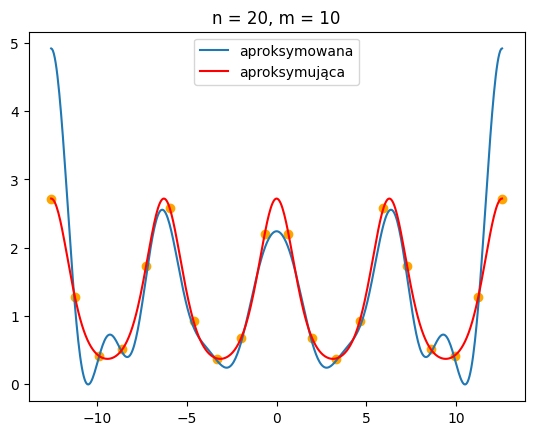

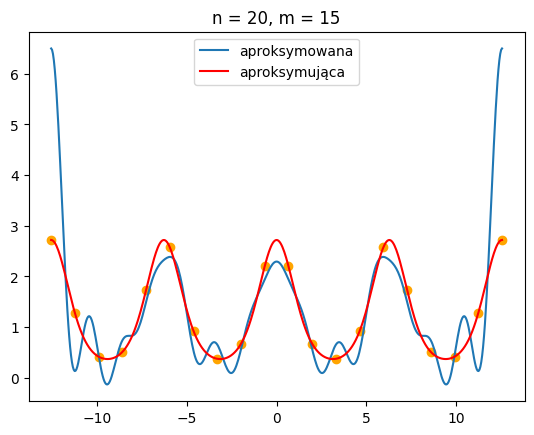

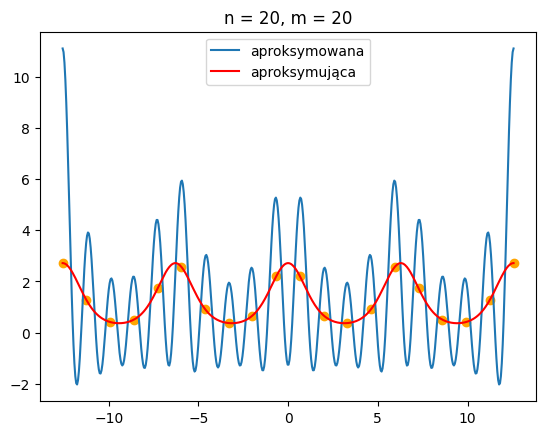

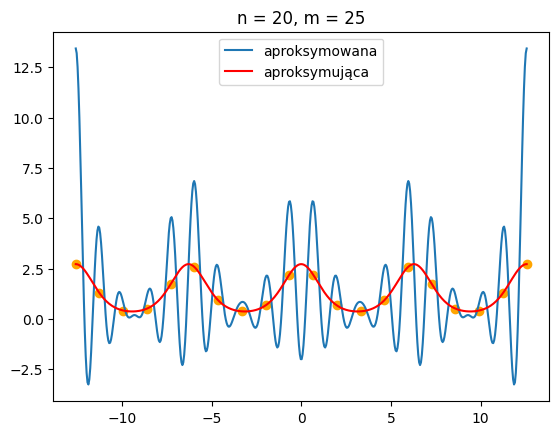

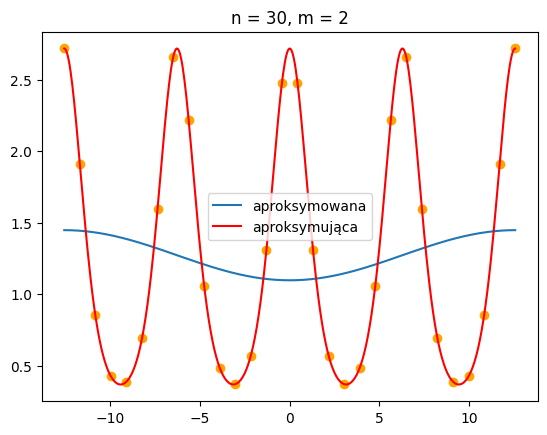

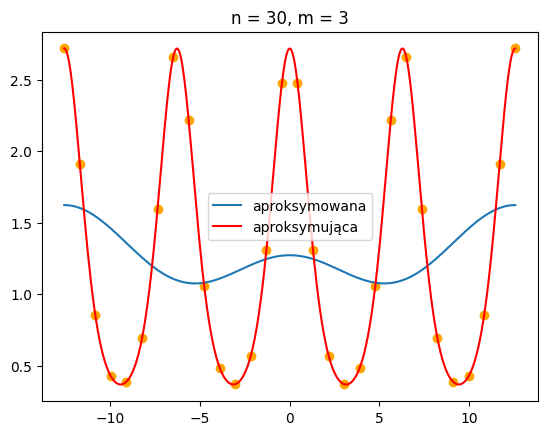

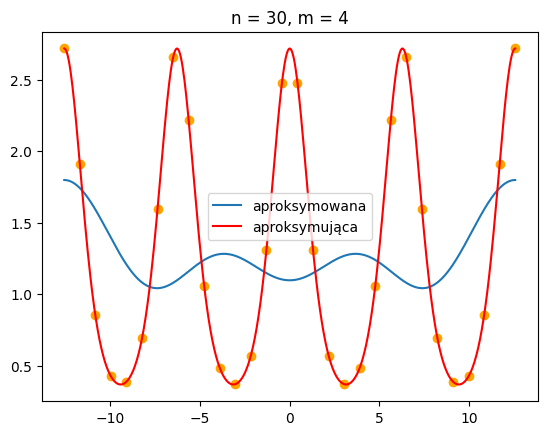

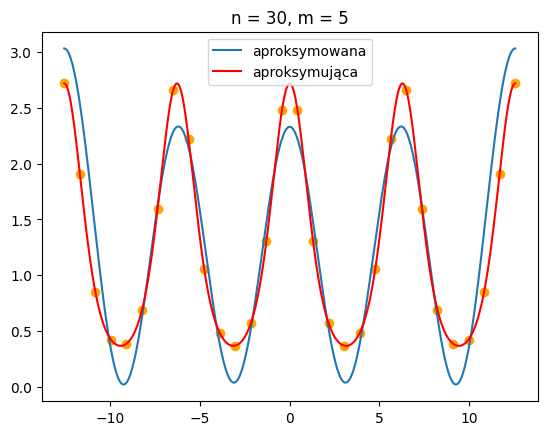

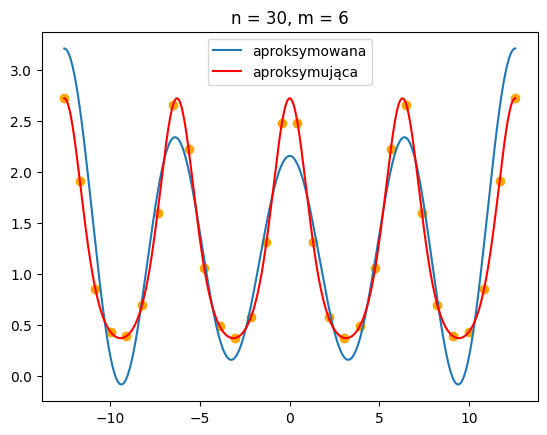

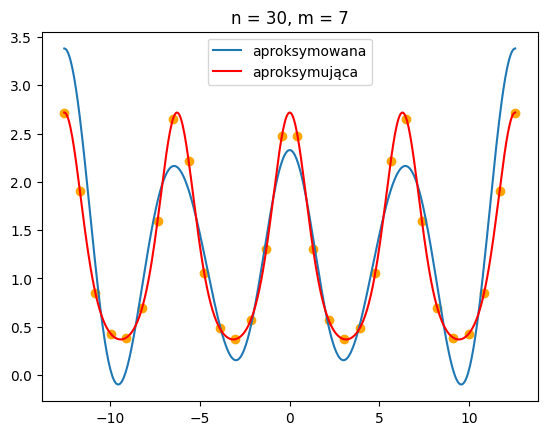

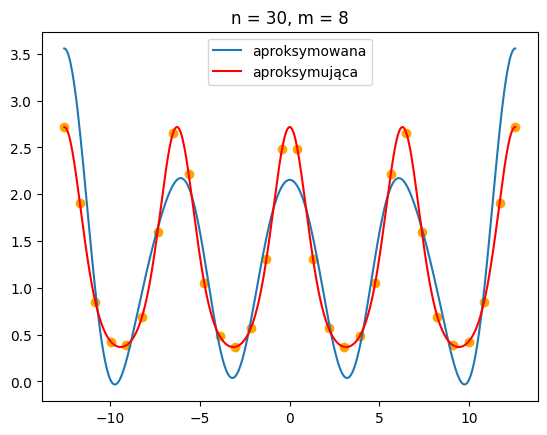

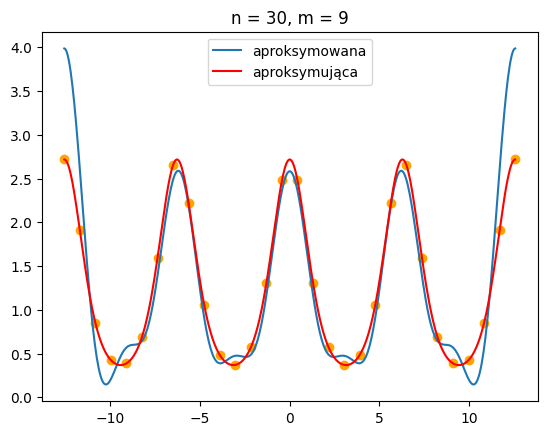

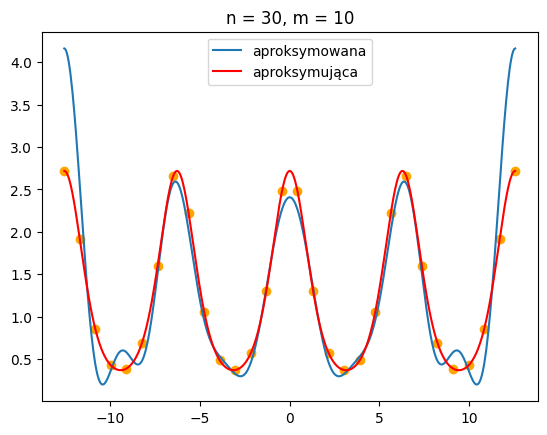

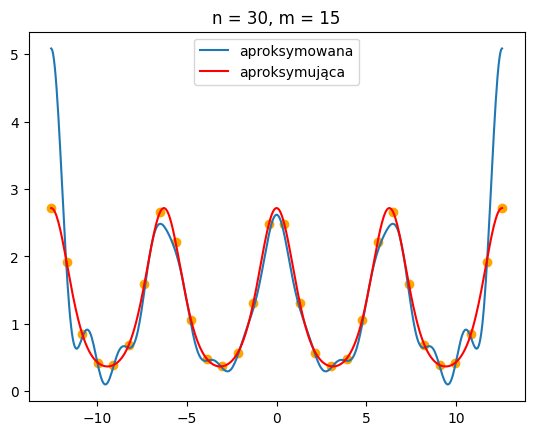

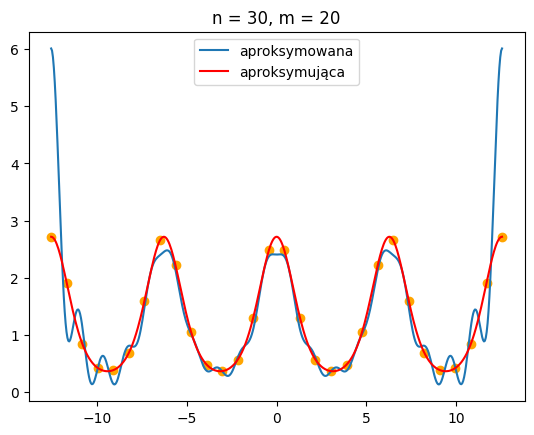

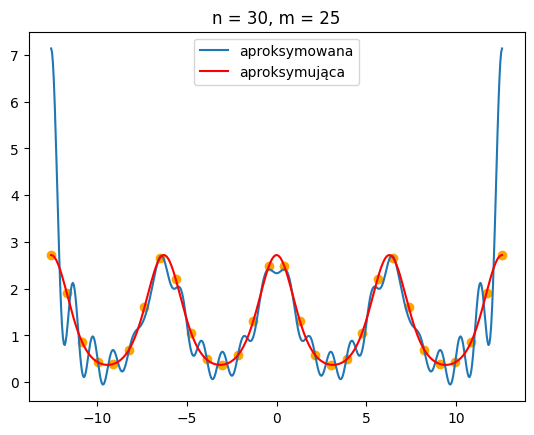

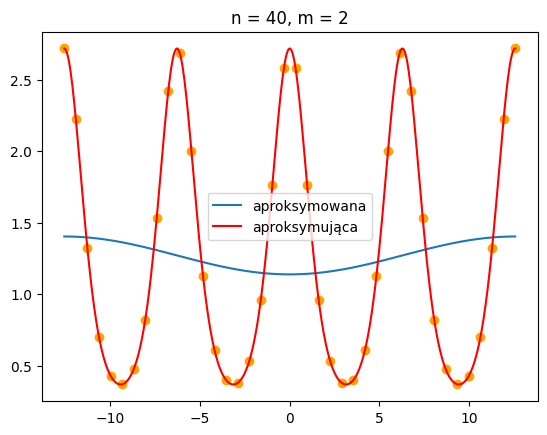

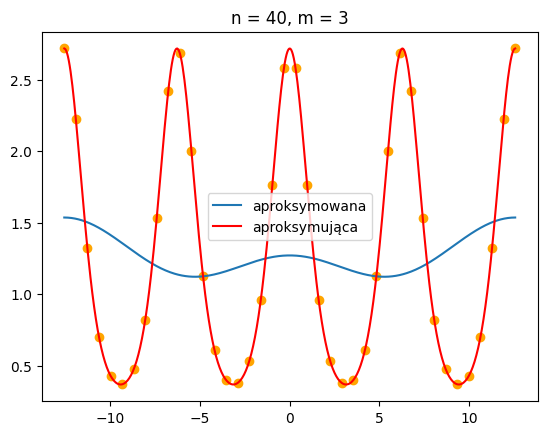

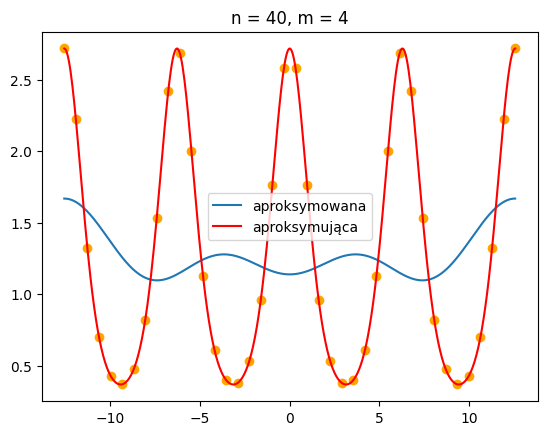

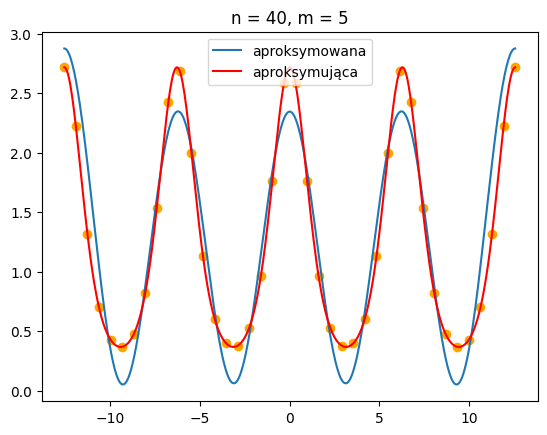

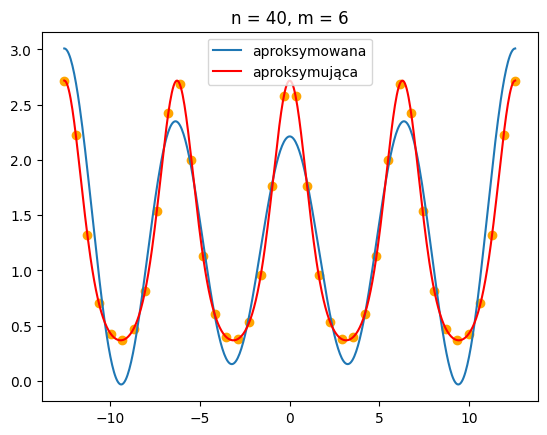

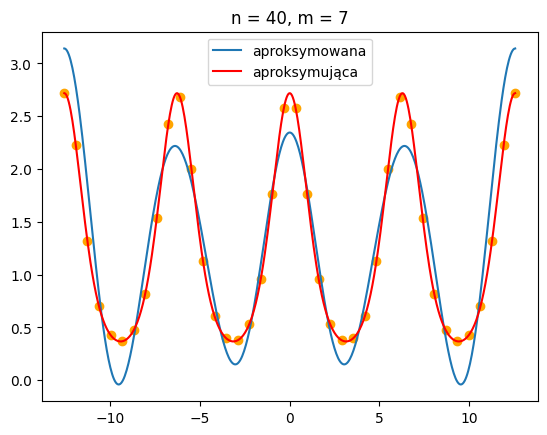

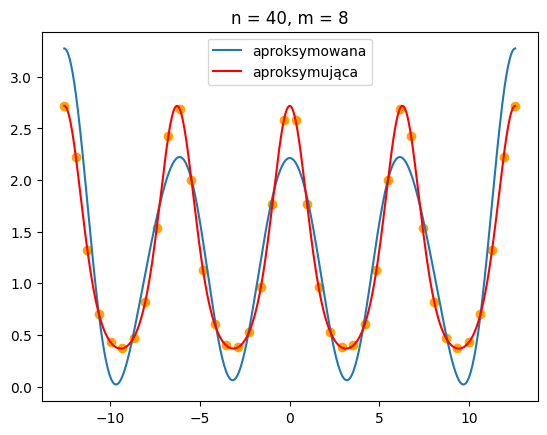

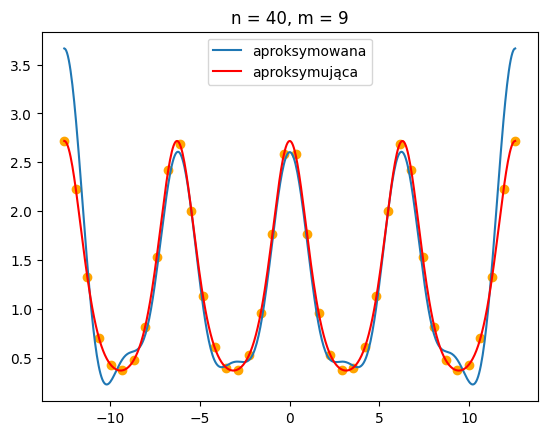

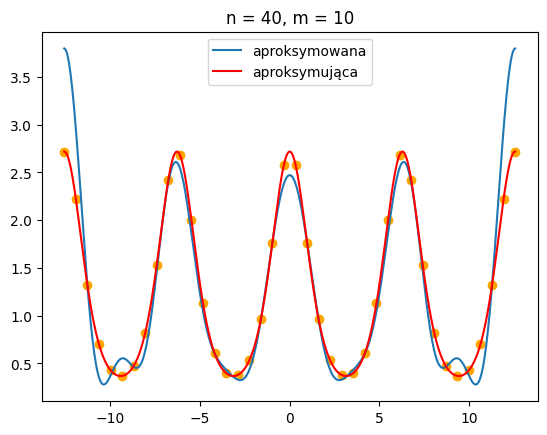

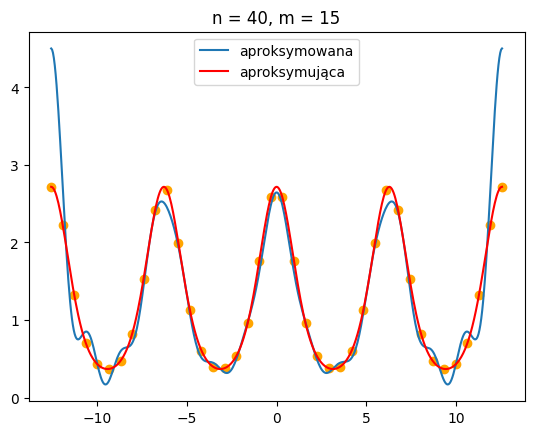

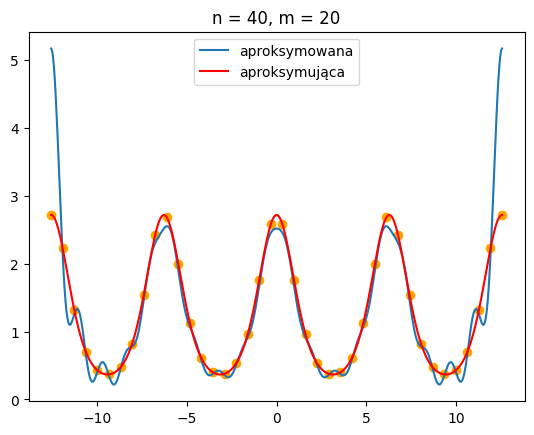

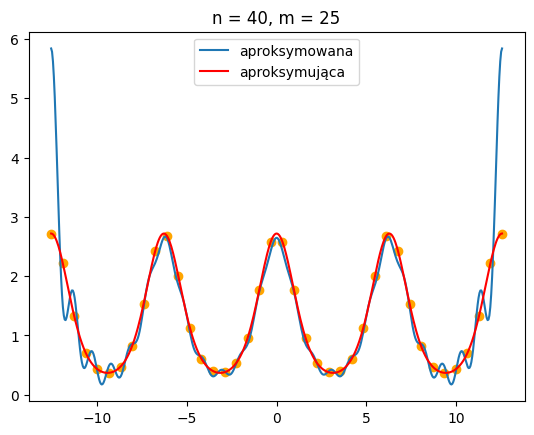

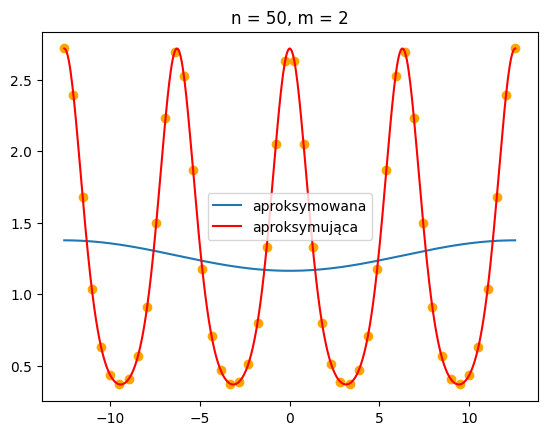

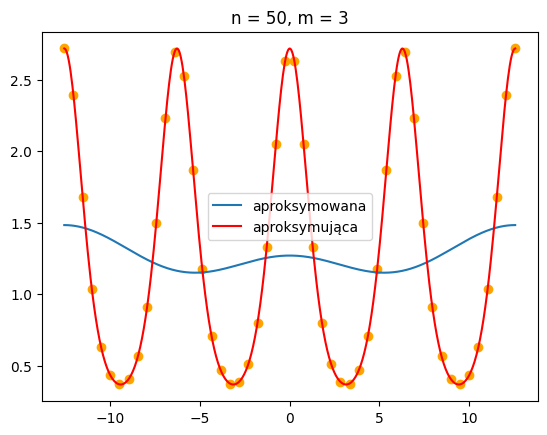

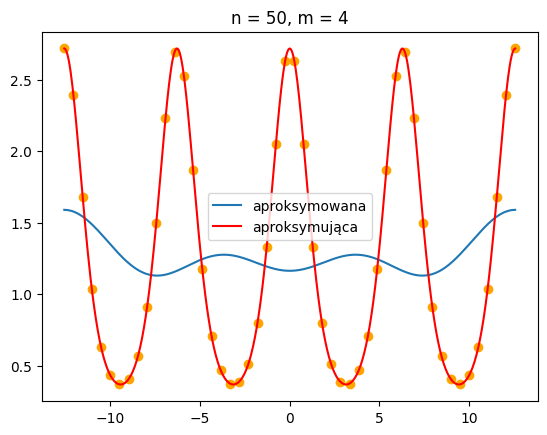

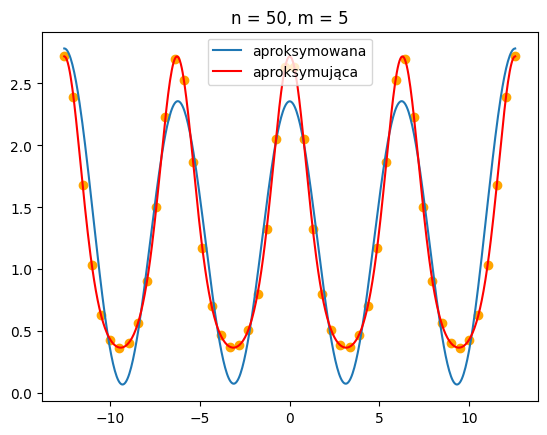

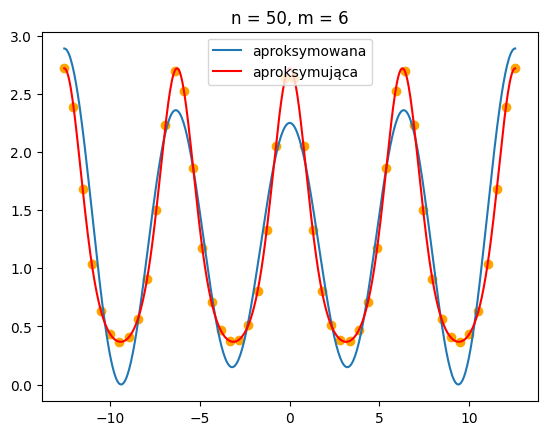

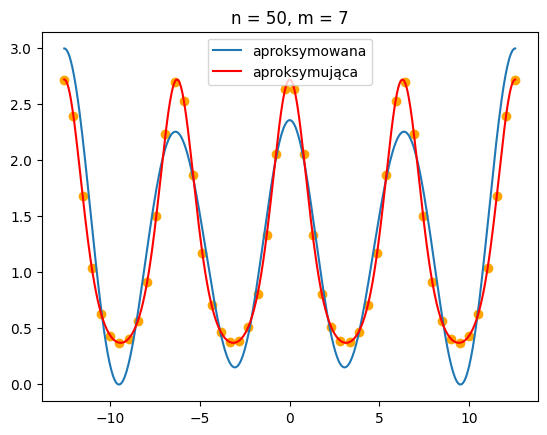

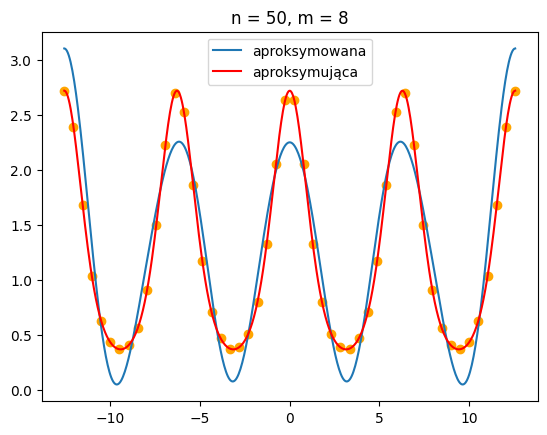

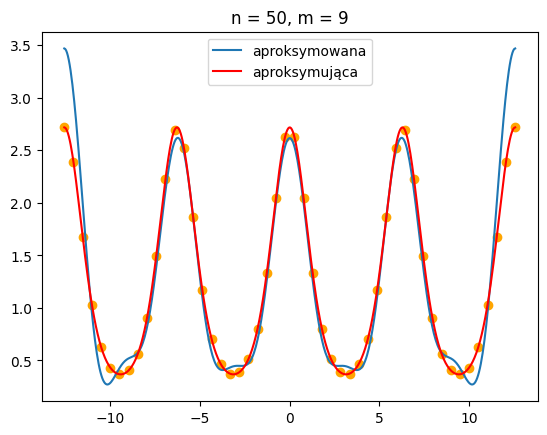

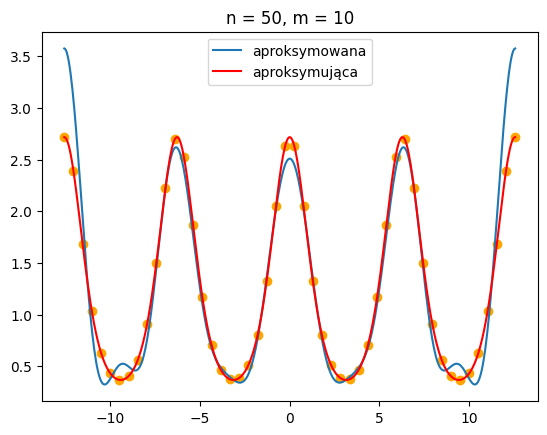

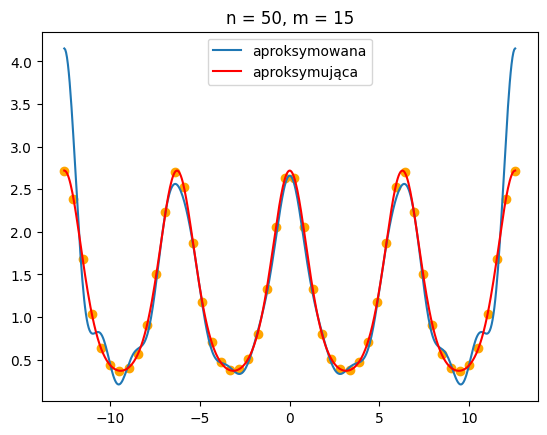

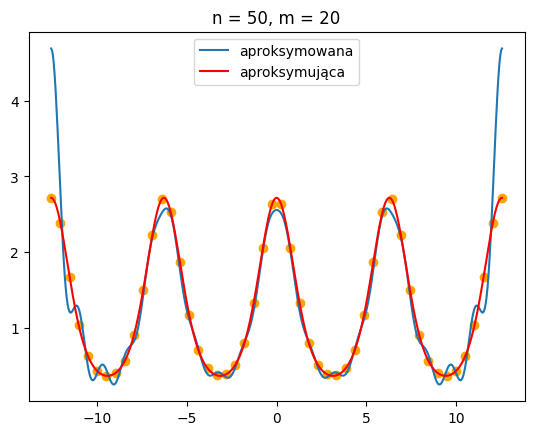

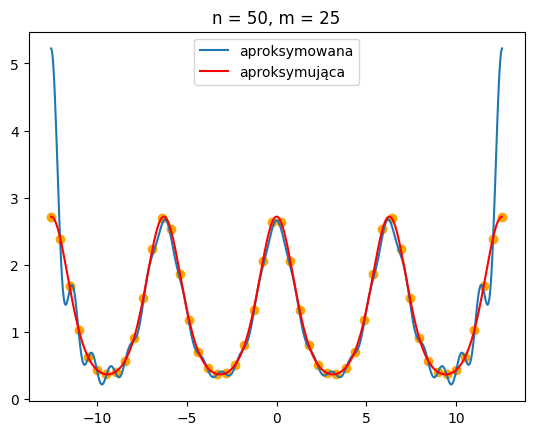

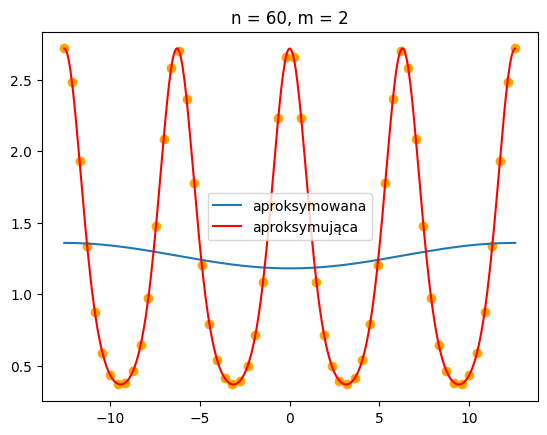

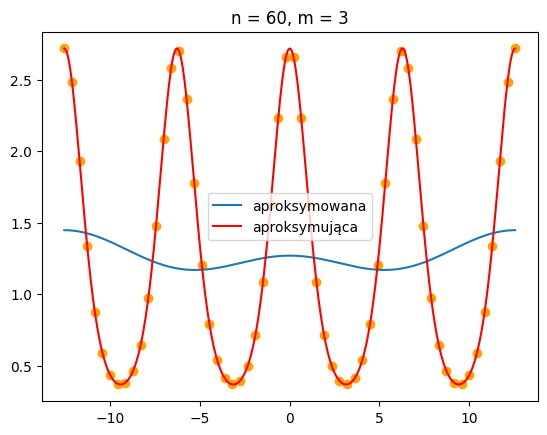

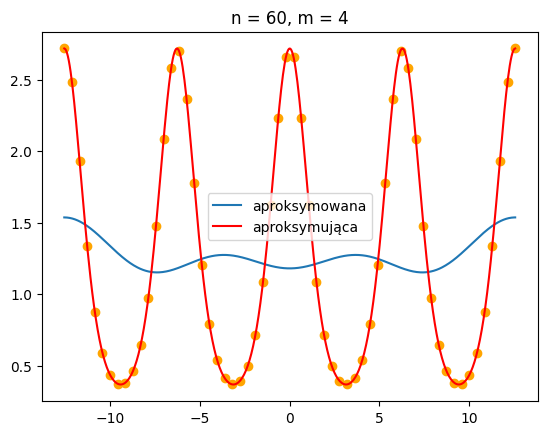

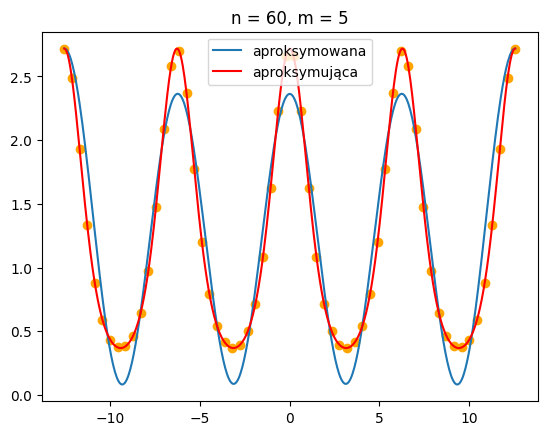

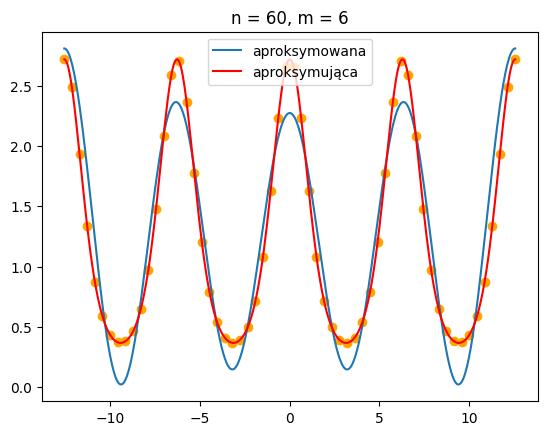

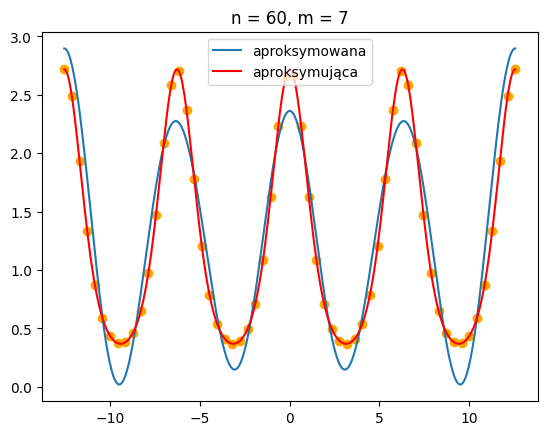

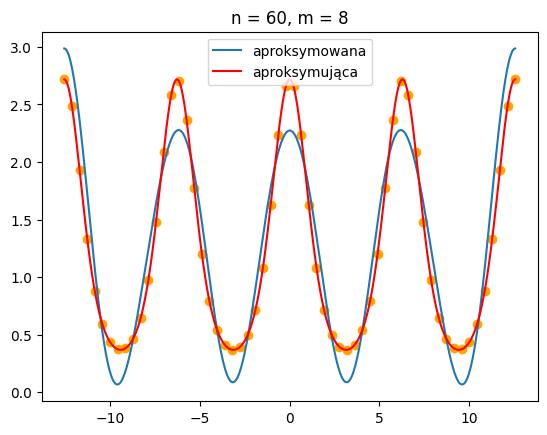

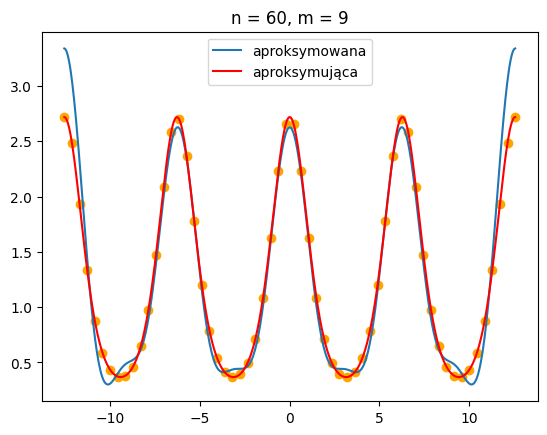

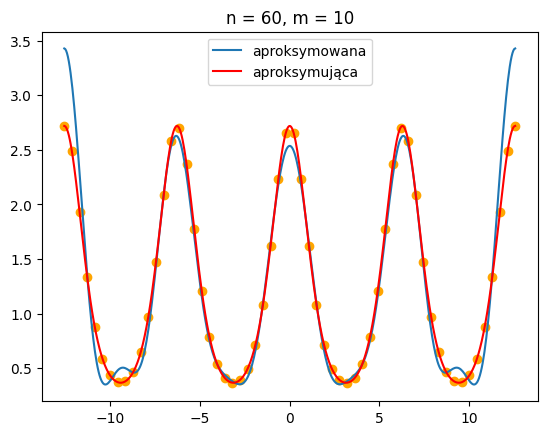

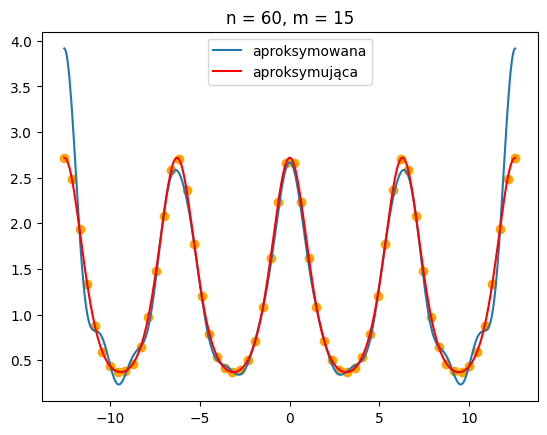

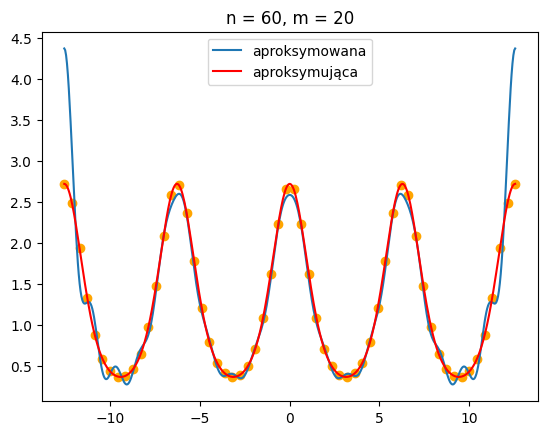

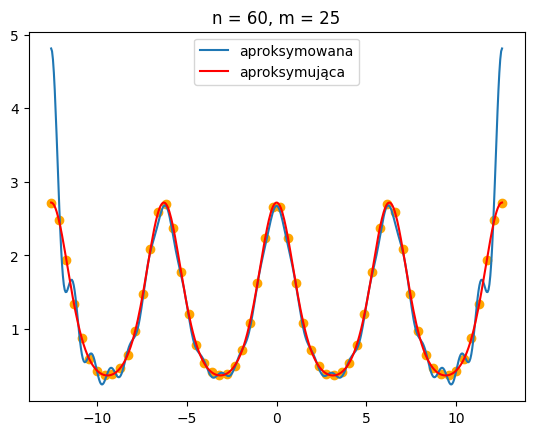

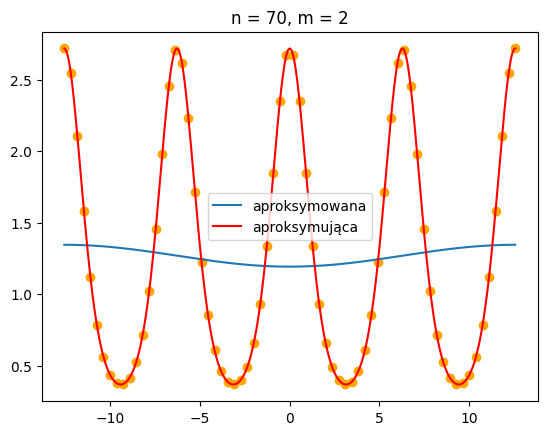

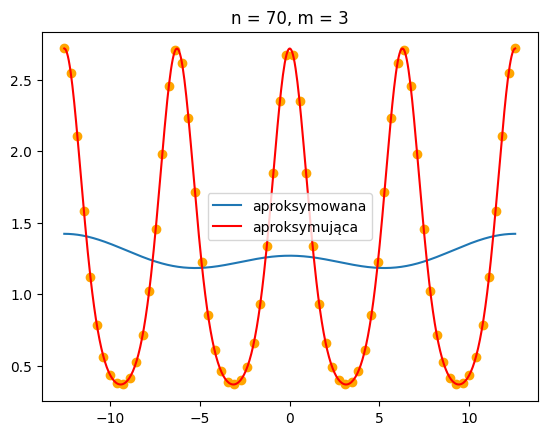

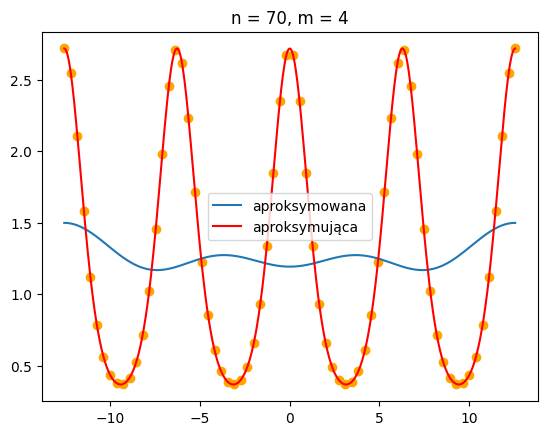

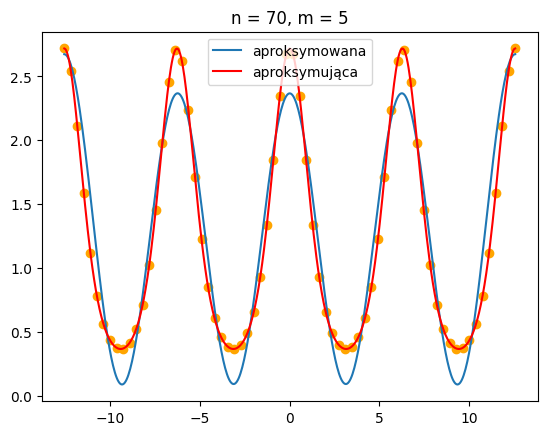

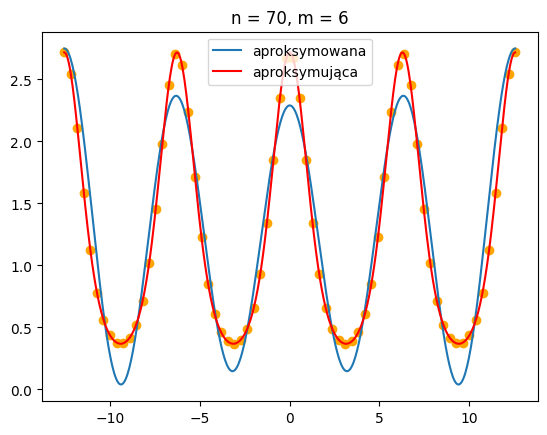

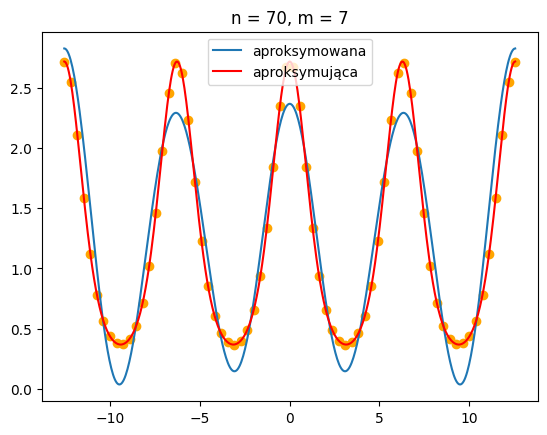

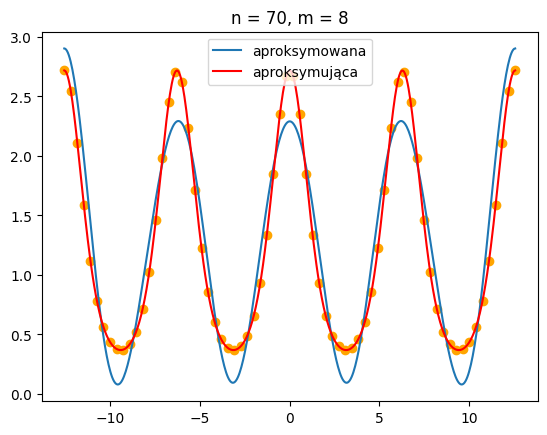

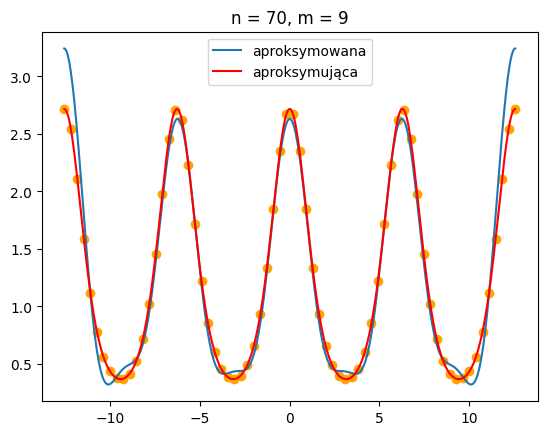

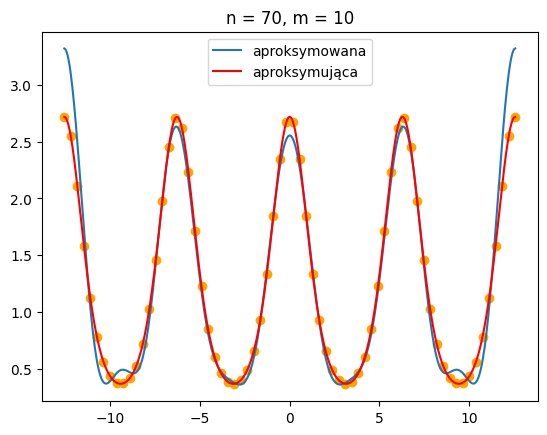

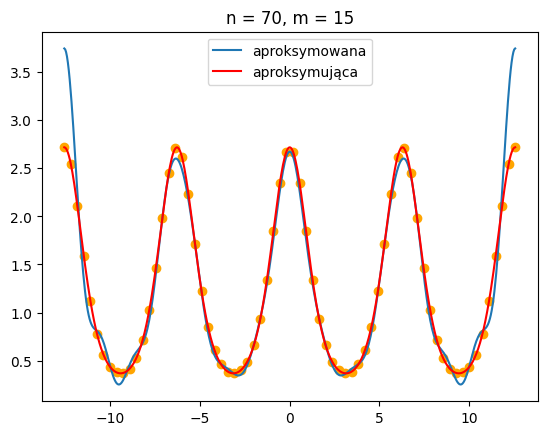

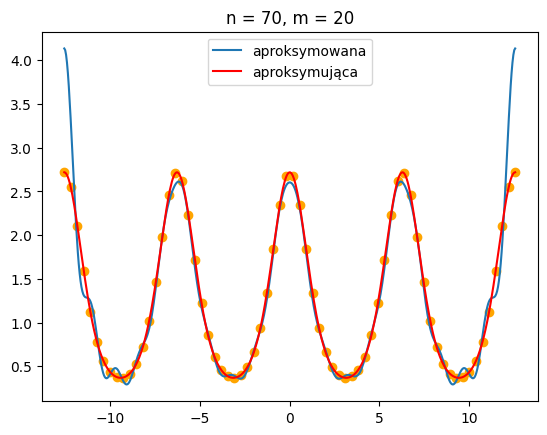

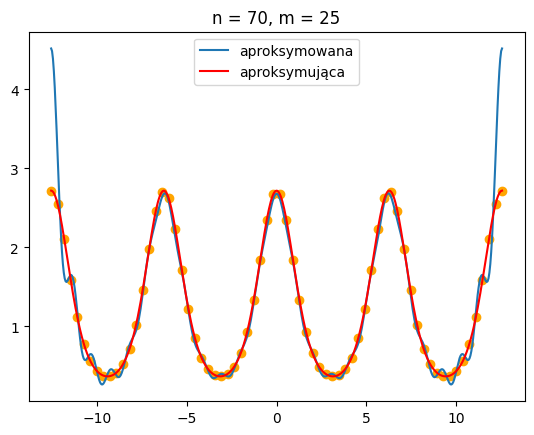

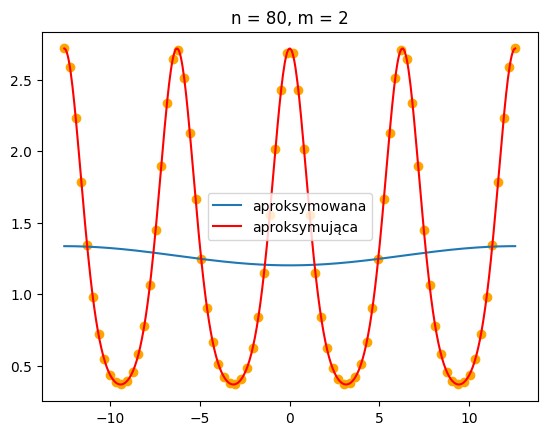

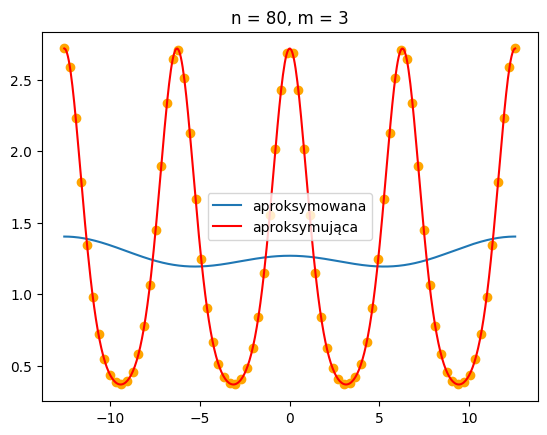

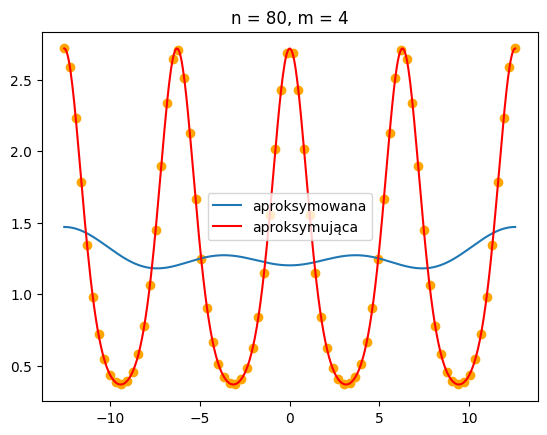

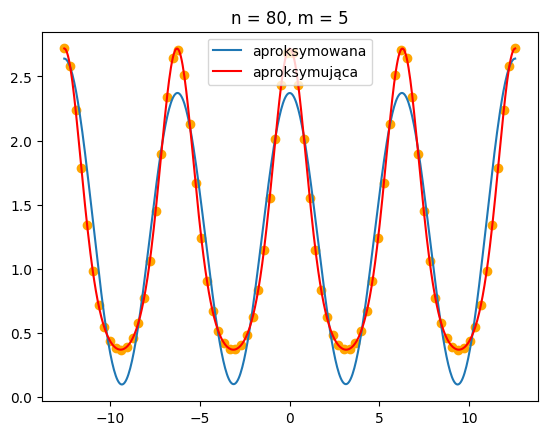

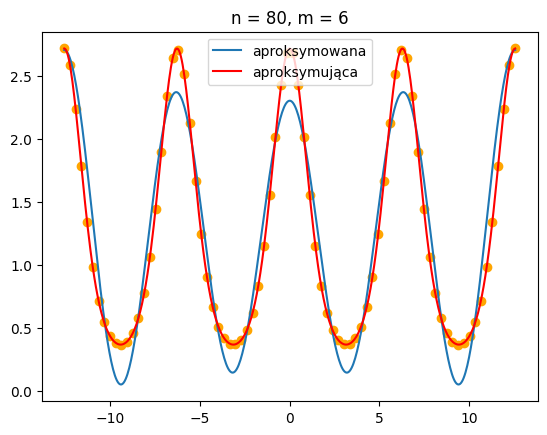

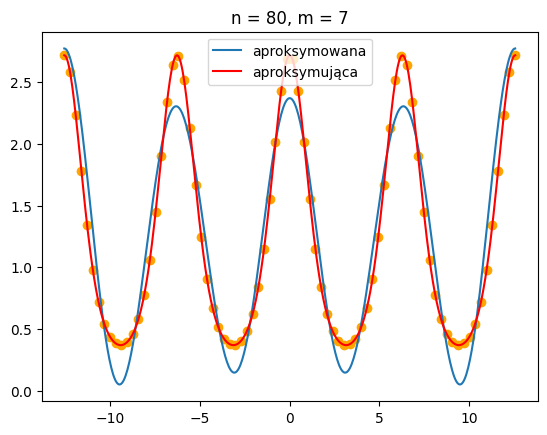

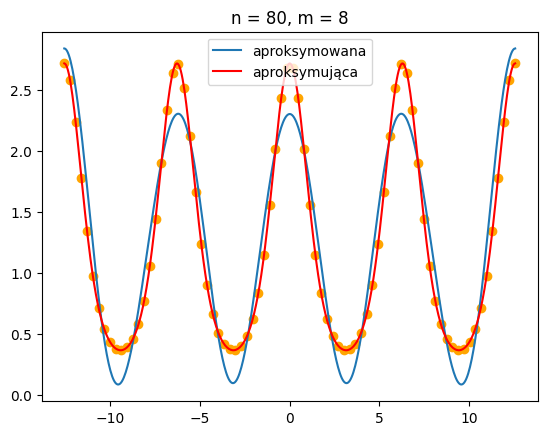

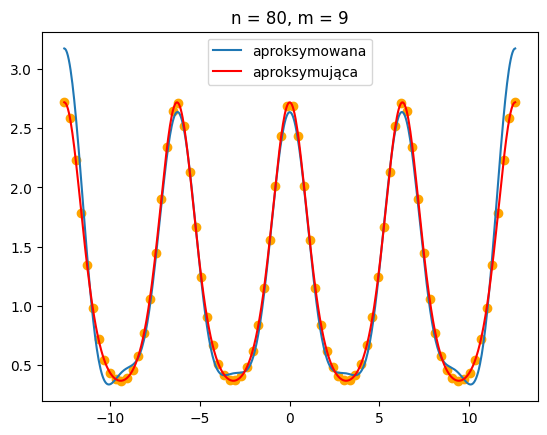

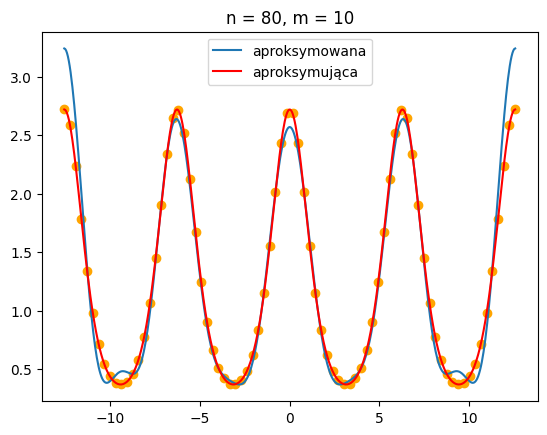

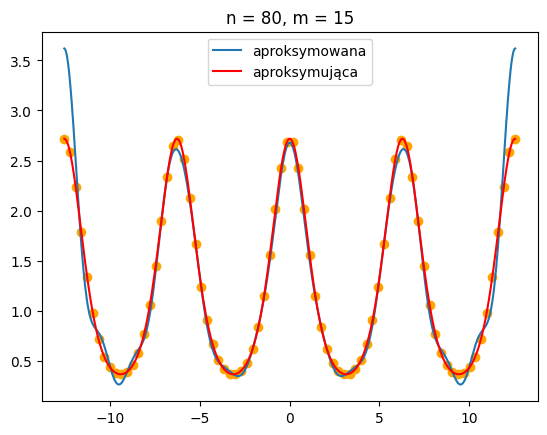

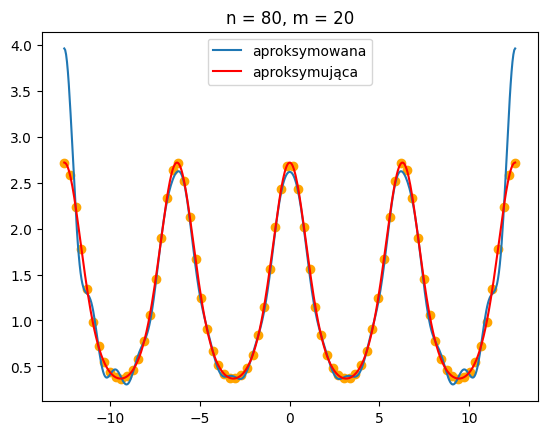

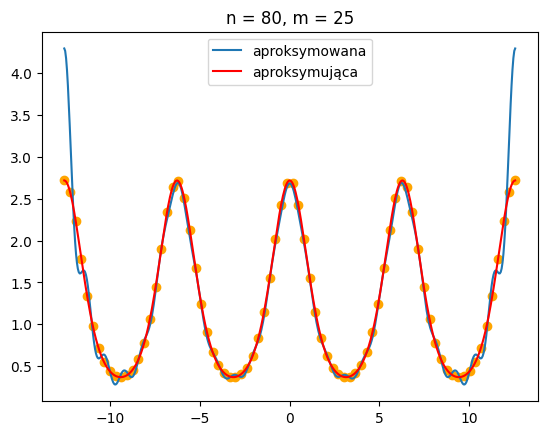

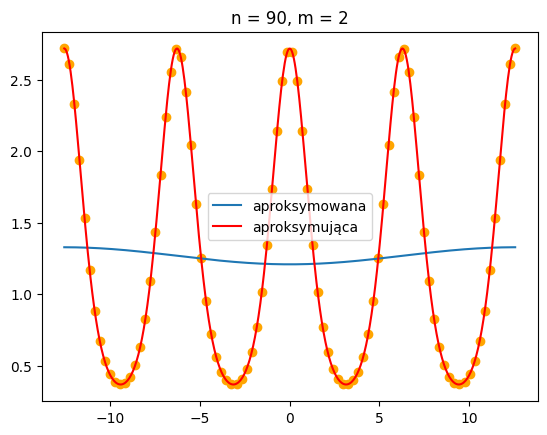

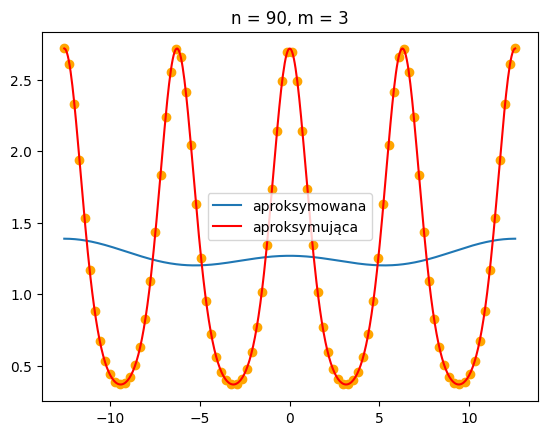

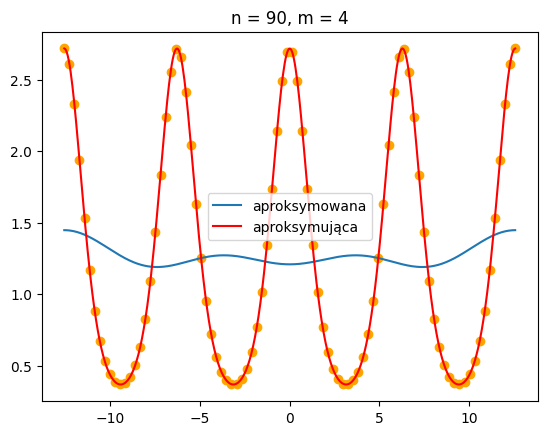

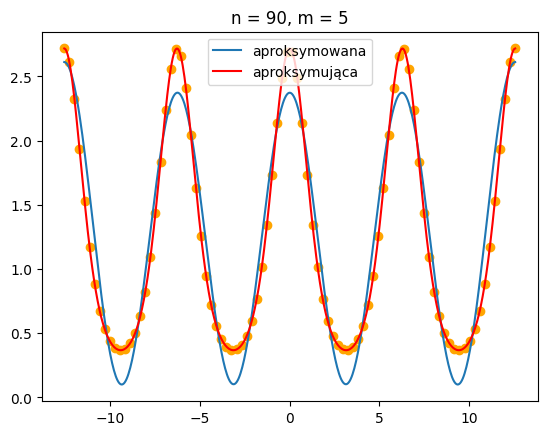

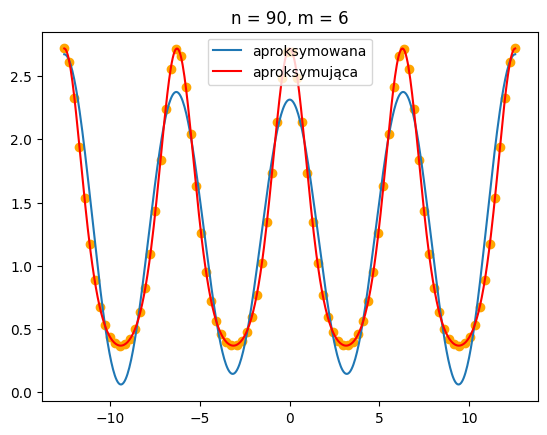

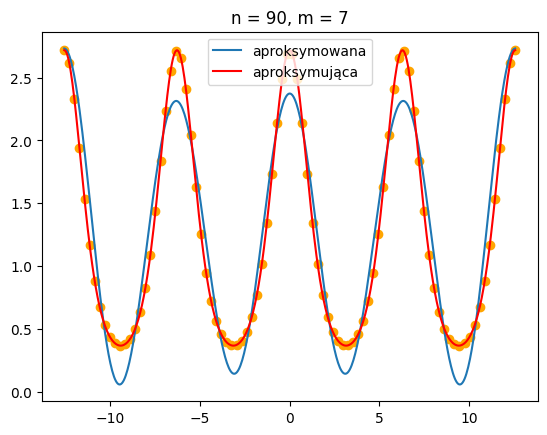

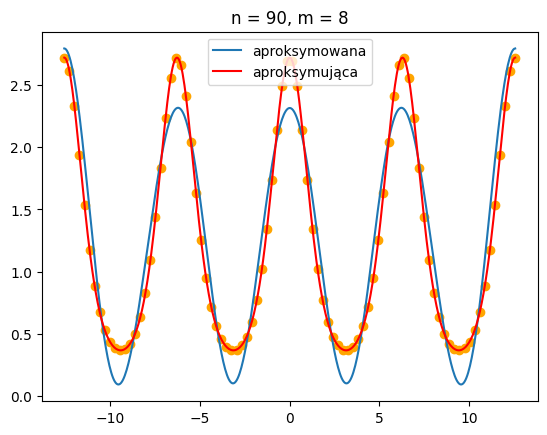

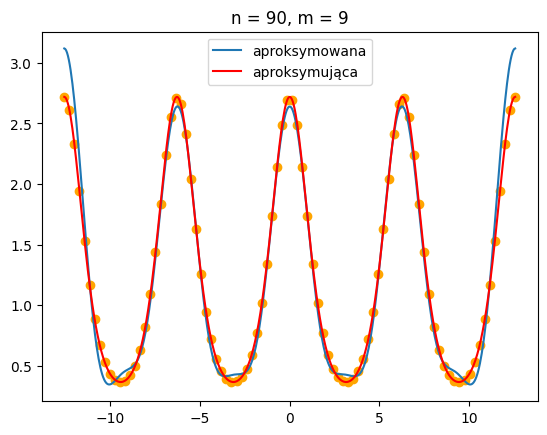

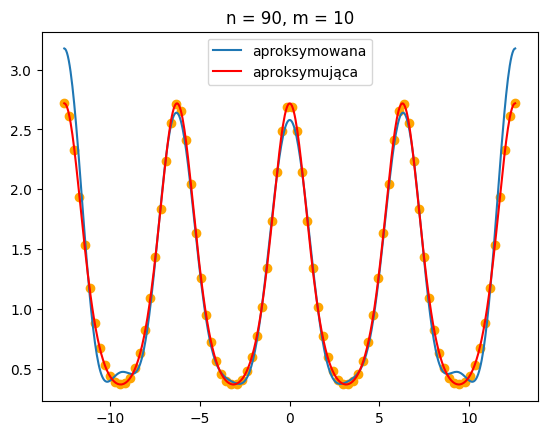

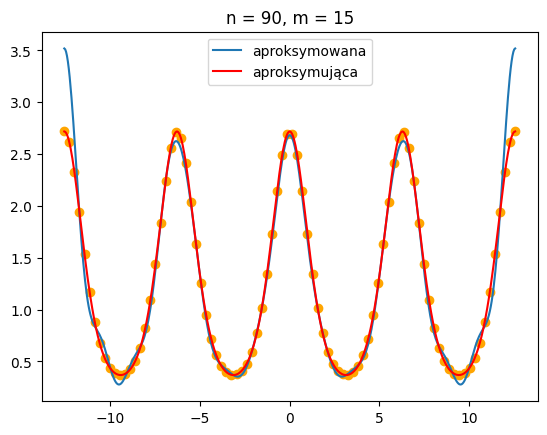

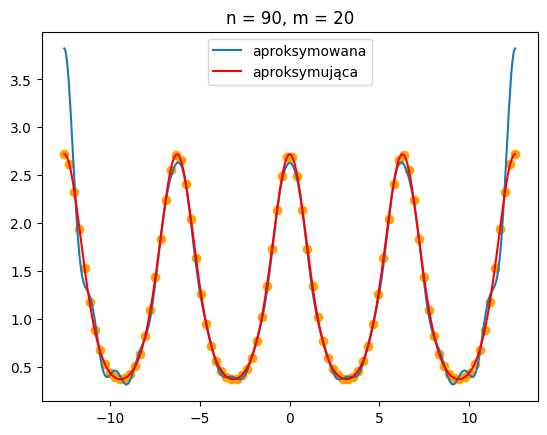

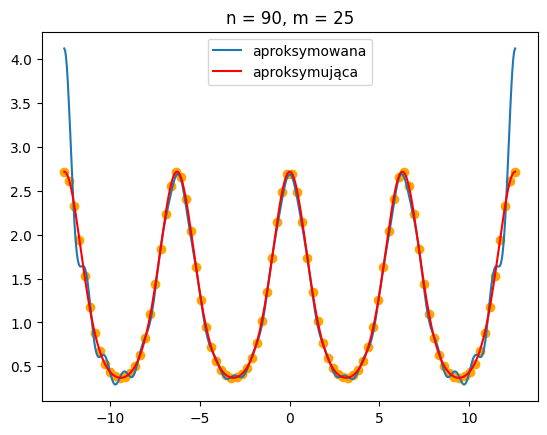

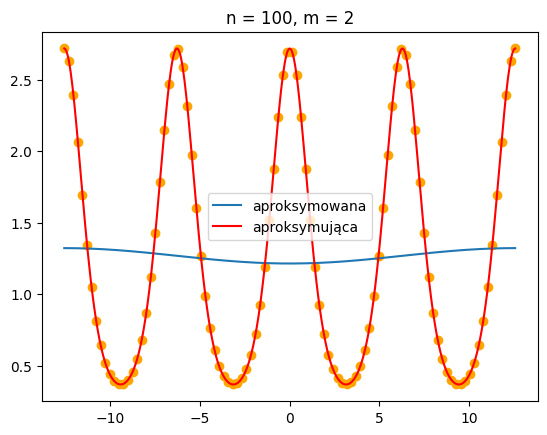

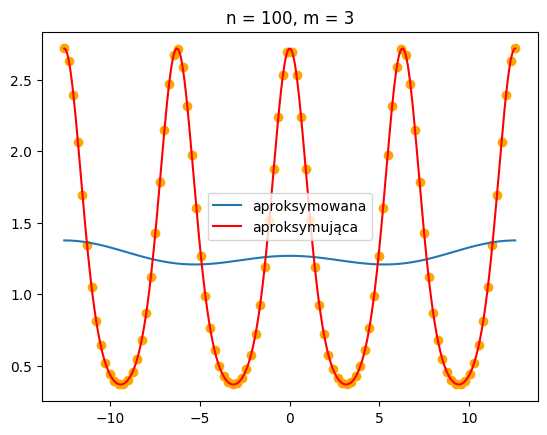

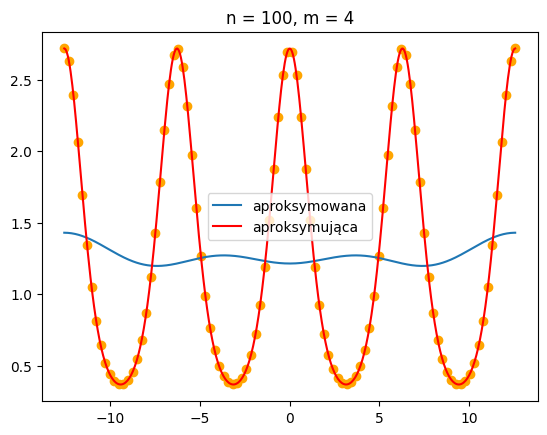

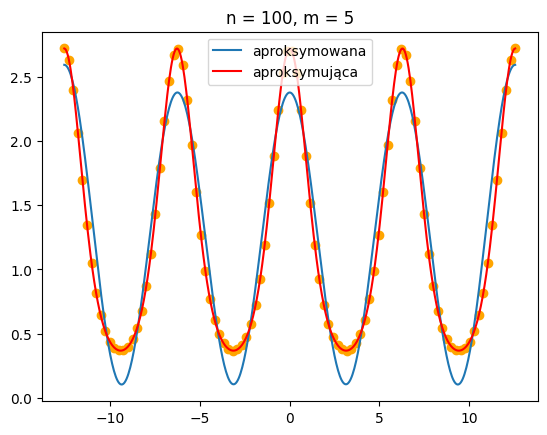

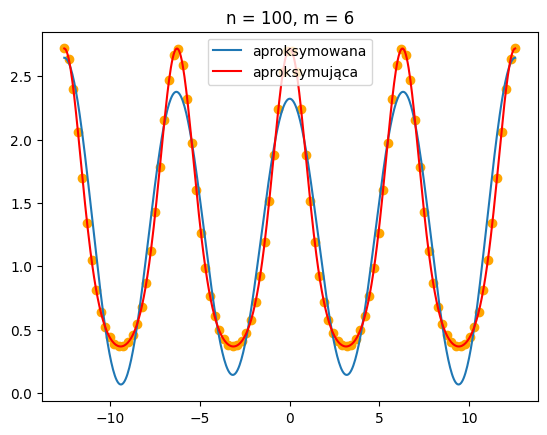

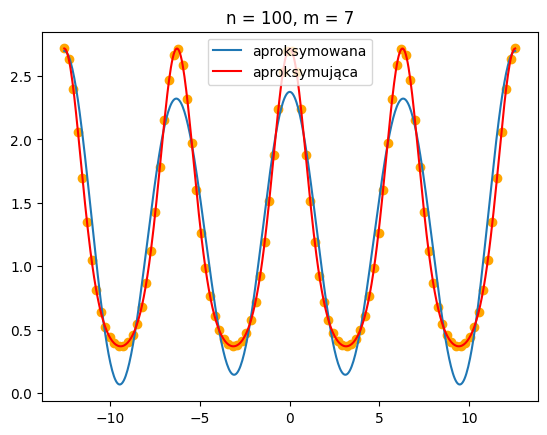

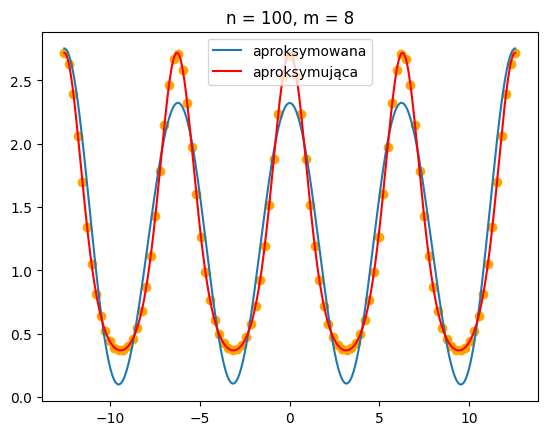

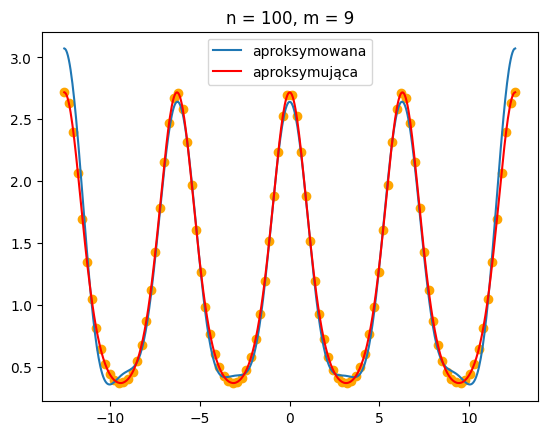

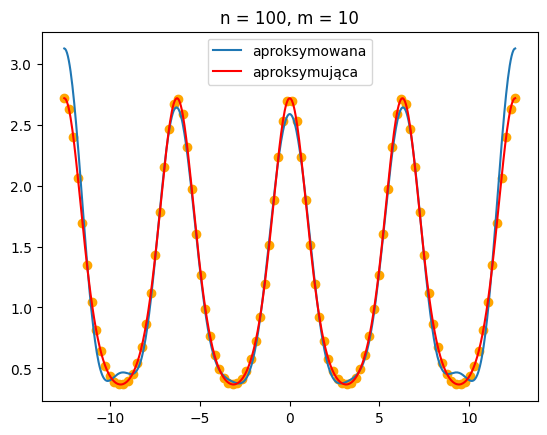

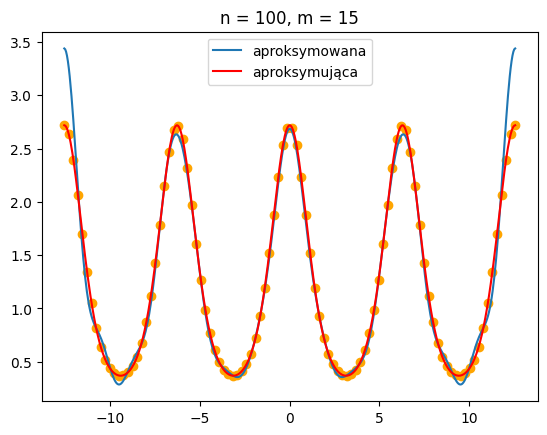

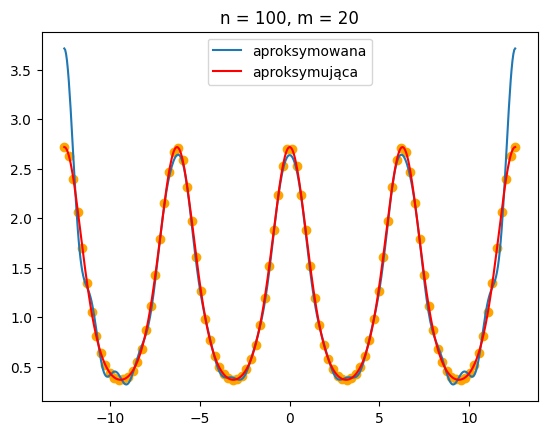

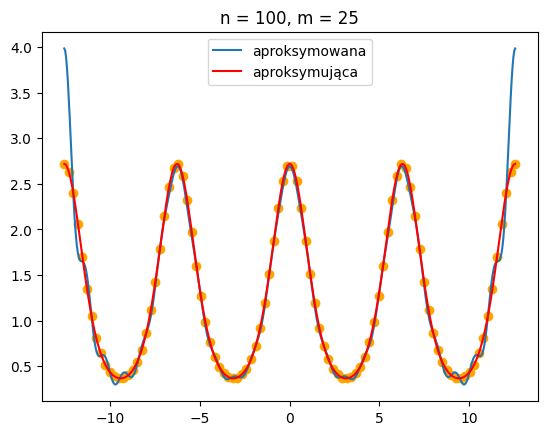

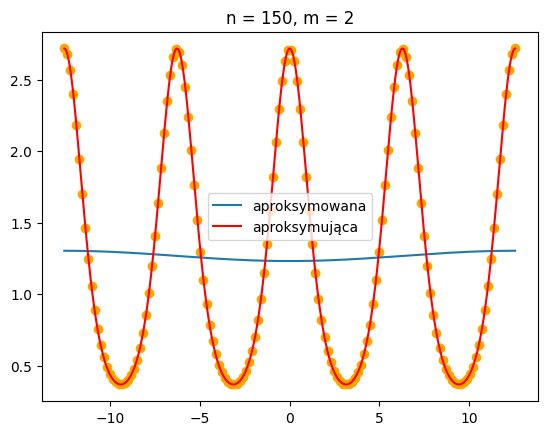

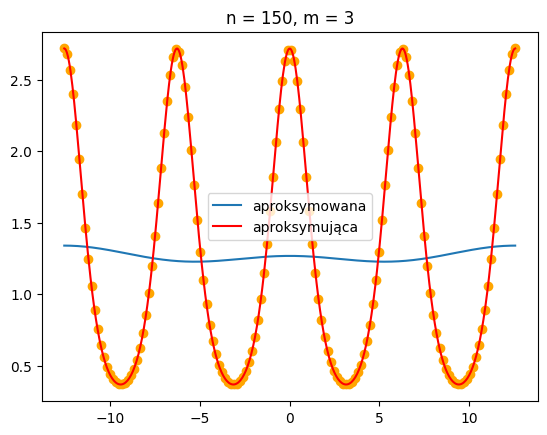

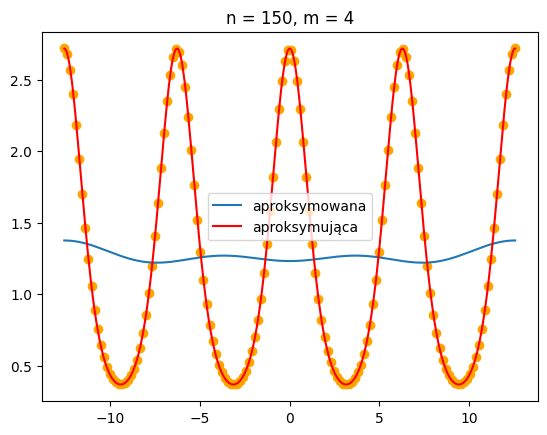

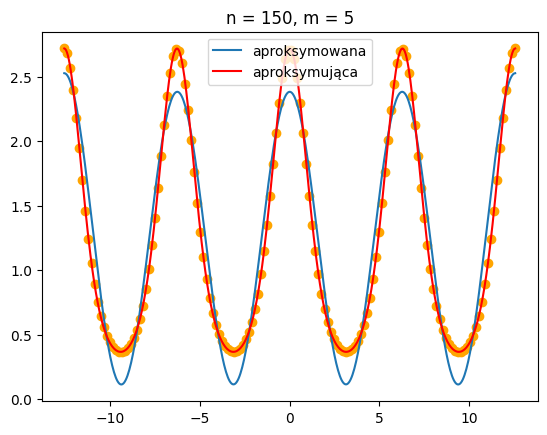

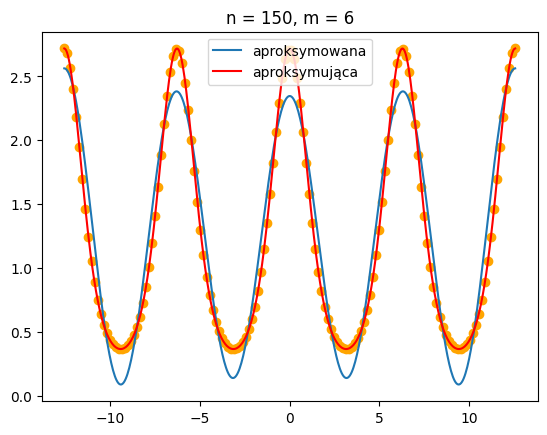

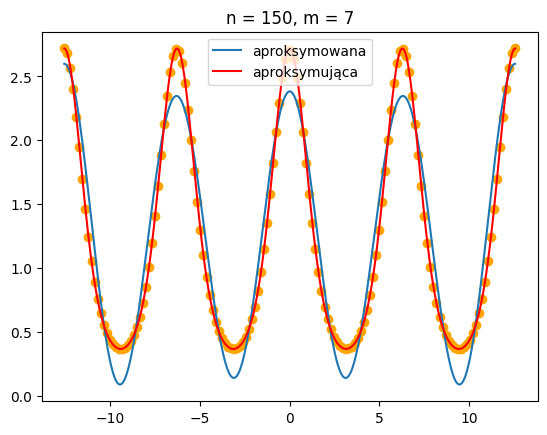

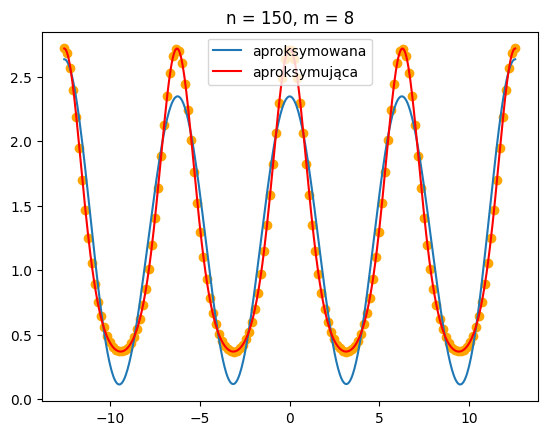

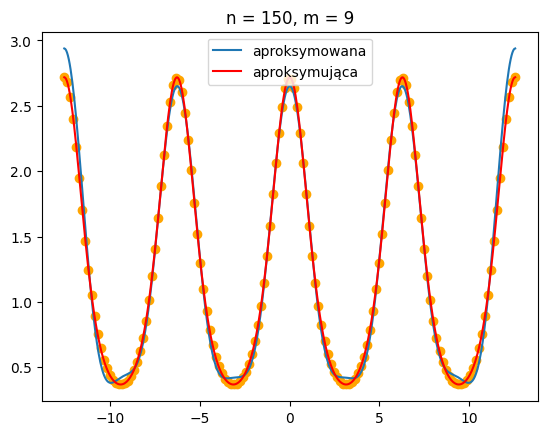

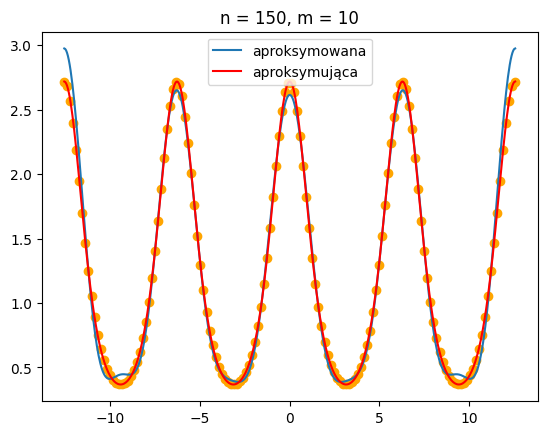

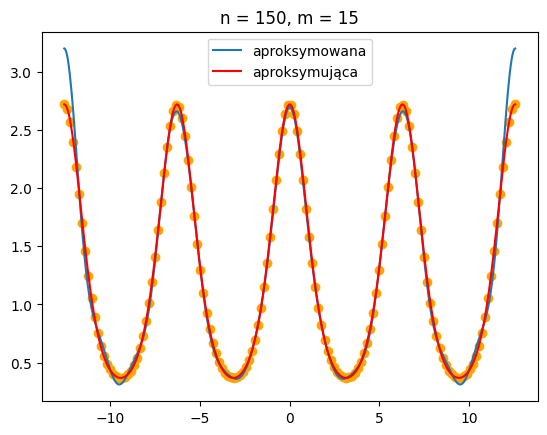

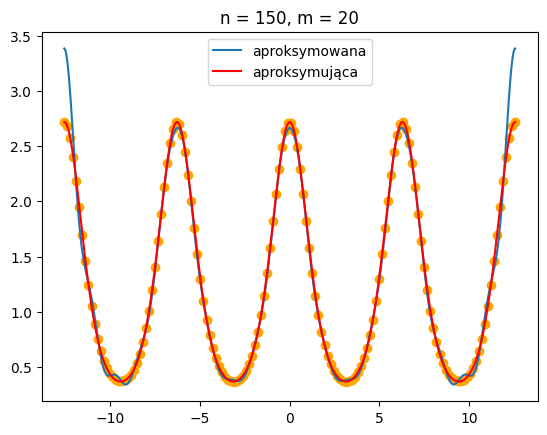

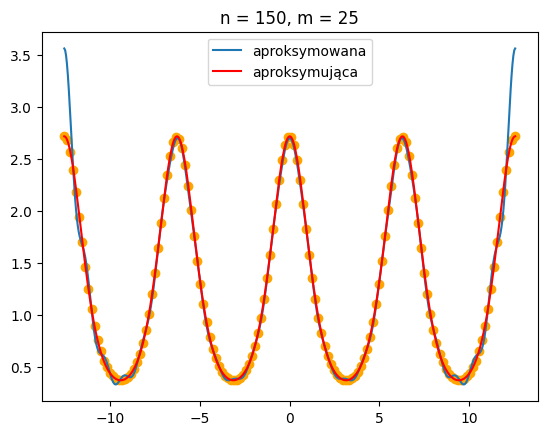

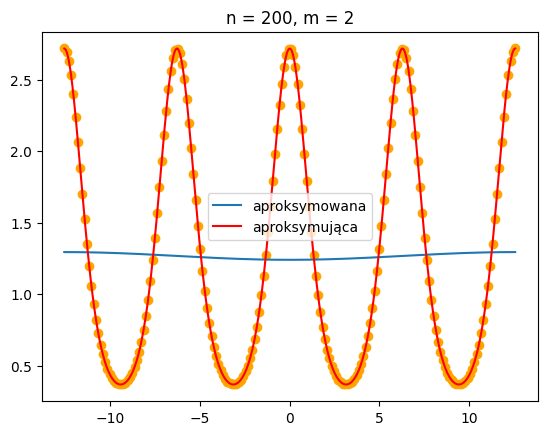

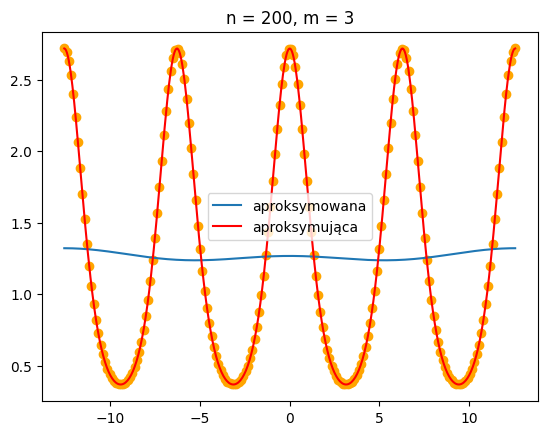

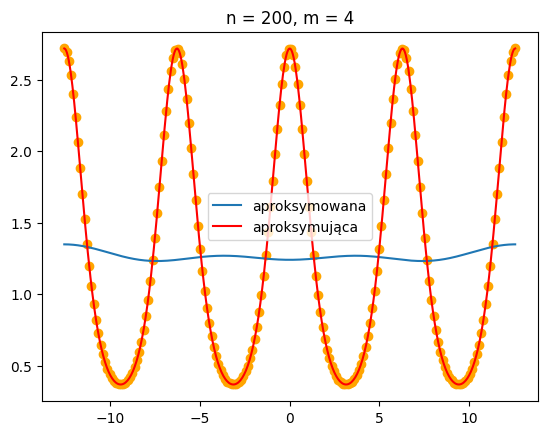

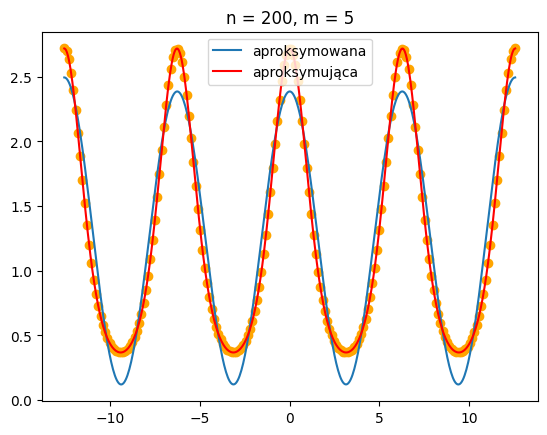

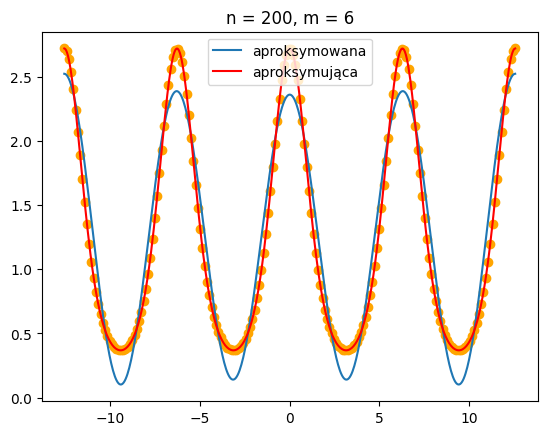

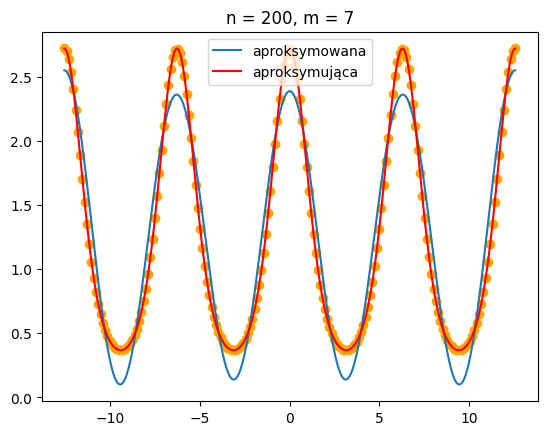

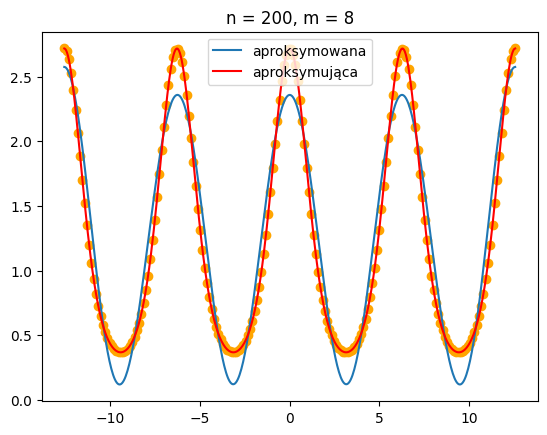

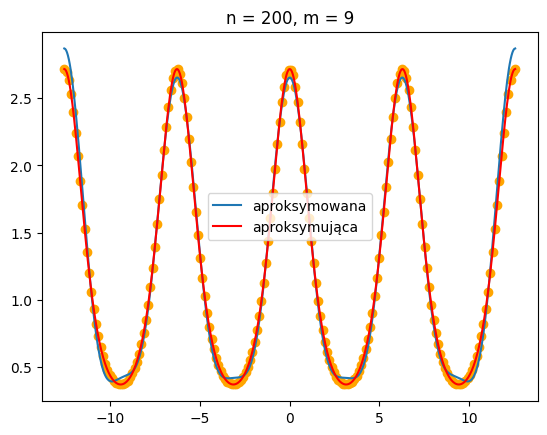

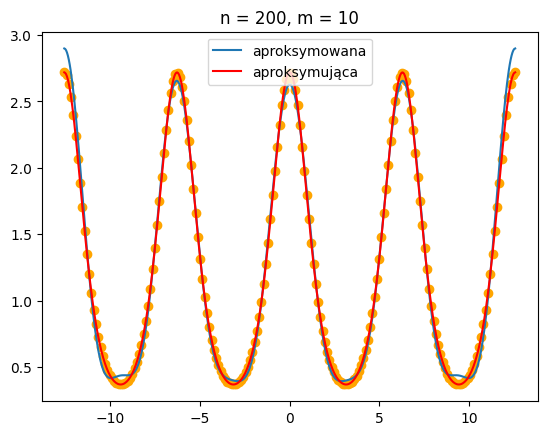

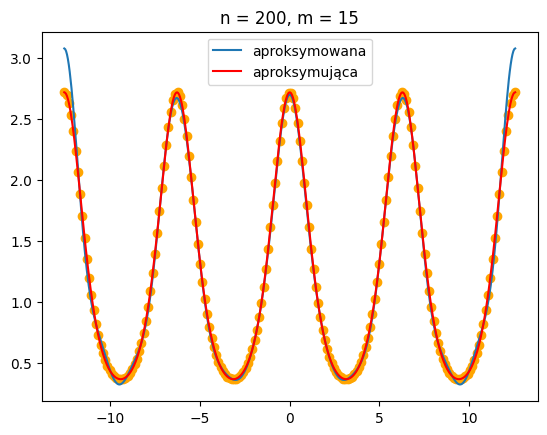

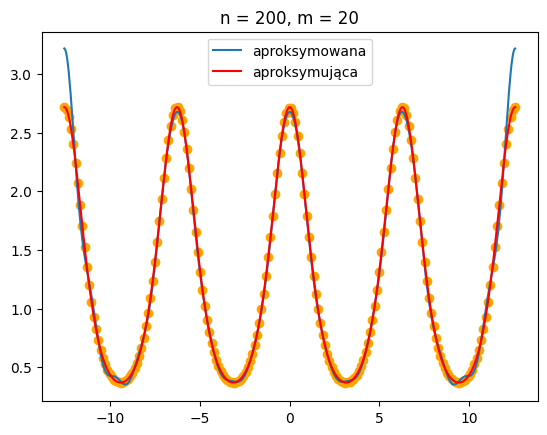

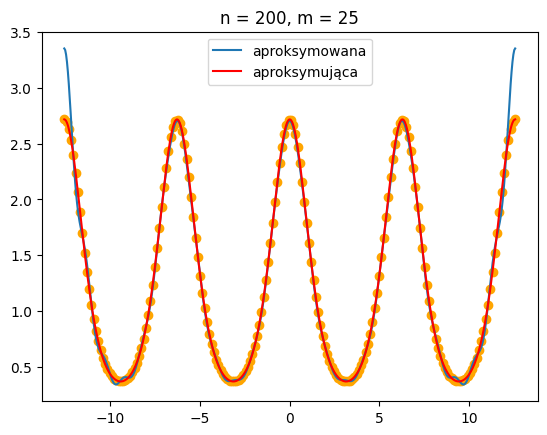

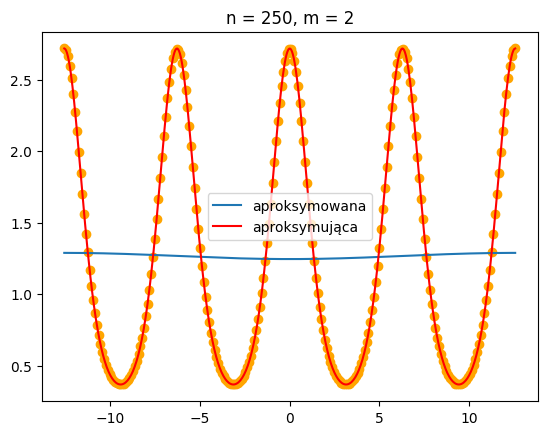

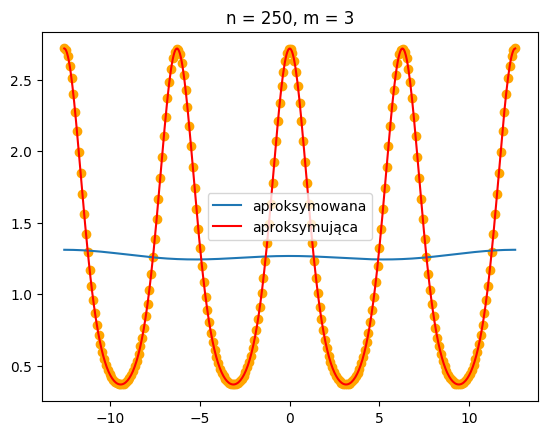

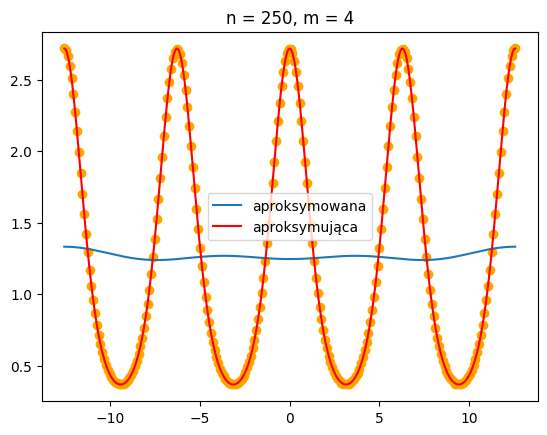

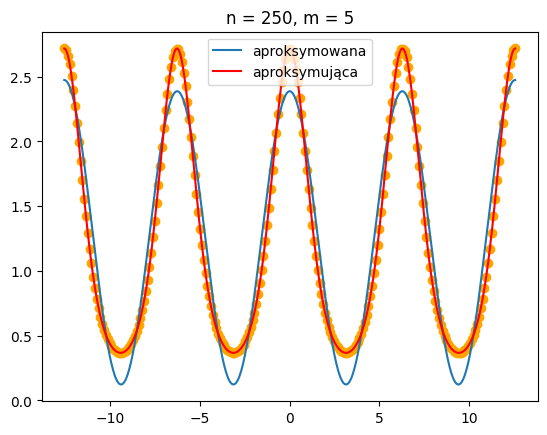

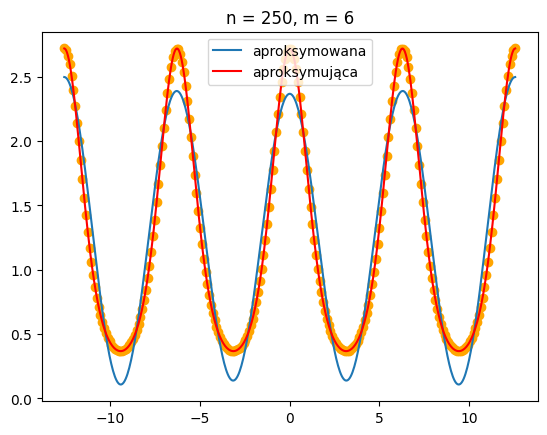

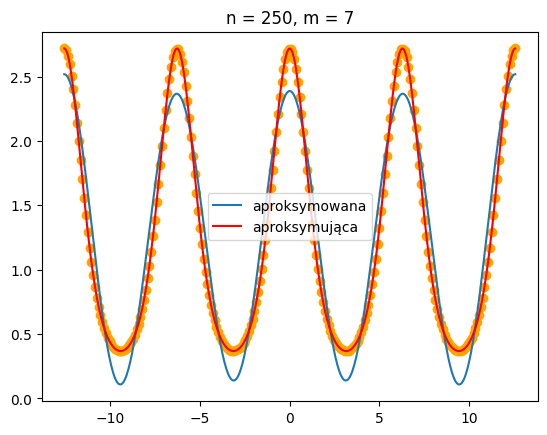

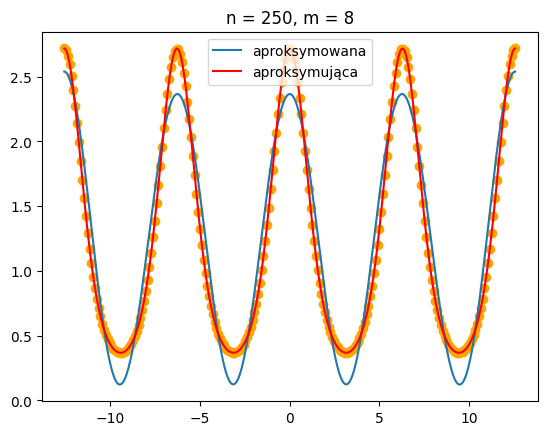

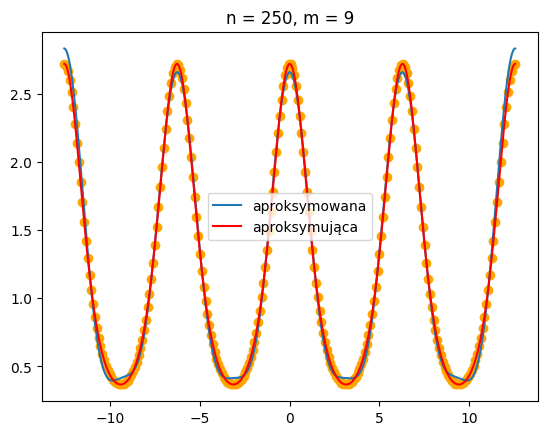

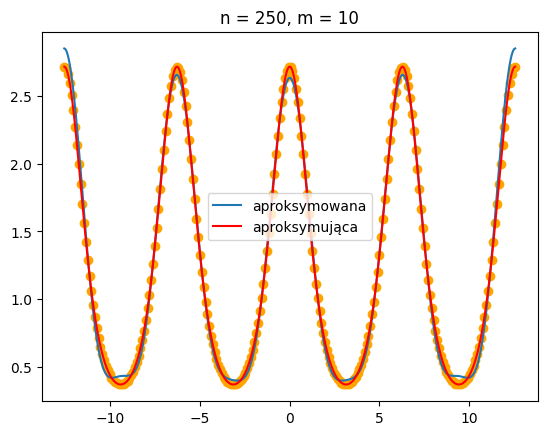

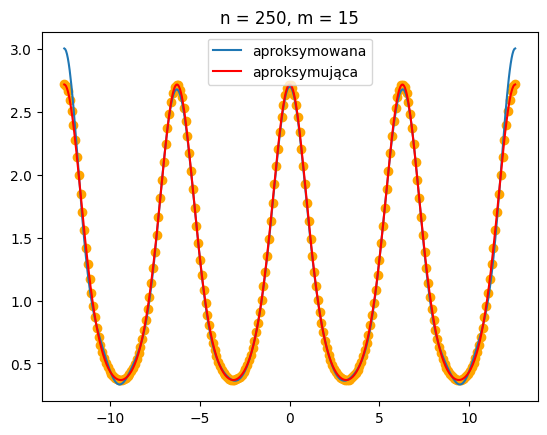

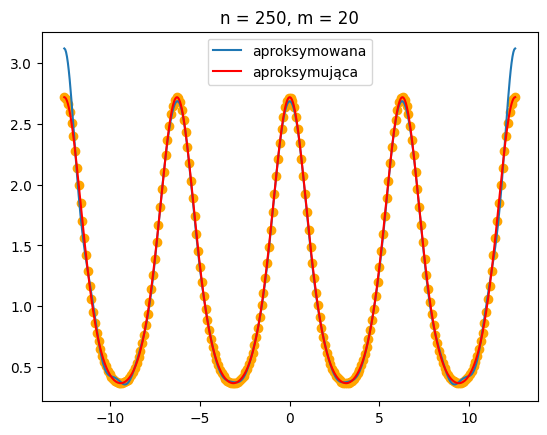

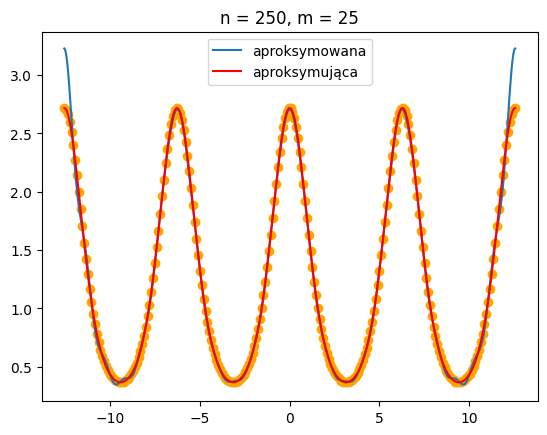

In [7]:
def test(n, m):
    nodes_x = range_evenly(START, STOP, n)
    nodes_y = f_real(nodes_x)

    nodes = list(zip(nodes_x, nodes_y))
    f = approximation(nodes, m, START, STOP)
    f_cos_only = approximation_cos_only(nodes, m, START, STOP)

    y_approx = [f(x) for x in x_real]
    y_approx_cos_only = [f_cos_only(x) for x in x_real]
    plt.plot(x_real, y_approx)
    plt.plot(x_real, y_real, c="red")
    plt.legend(["aproksymowana", "aproksymująca"])
    plt.scatter(nodes_x, nodes_y, c="orange")
    plt.title(f"n = {n}, m = {m}")
    plt.show()
    max_errors[-1].append(max_err(y_approx))
    std_errors[-1].append(std_err(y_approx, N))

points = list(range(10, 101, 10)) + list(range(150, 251, 50))
functions = list(range(2, 11)) + list(range(15, 26, 5))
header = ["liczba punktów\\liczba funkcji", *functions]
max_errors.append(header)
std_errors.append(header)

for no_points in points:
    max_errors.append([no_points])
    std_errors.append([no_points])
    for no_functions in functions:
                test(no_points, no_functions)

In [8]:
def format_output(output) -> str:
    if type(output) == int:
        return str(output)

    if type(output) == str:
        return output
    else:
        return f"{output}"

for row in max_errors:
    print(",".join(map(format_output, row)))


print("--------------------------------")

for row in std_errors:
    print(",".join(map(format_output, row)), end="\n")

liczba punktów\liczba funkcji,2,3,4,5,6,7,8,9,10,15,20,25
10,2.1507854678168155,1.9400967930409876,2.182119676562289,1.8661546899430808,3.148854738714889,3.6794002024850703,4.178556398640028,4.894924625810734,7.460901867184928,12.045049813671763,17.073465169312506,21.47179035239882
20,1.7018599539418204,1.7028315312335178,1.706786292036081,0.9318375452452122,1.013523560597295,1.148372156268091,1.437104359452742,1.9416269836463391,2.200513861133511,3.780730480553689,8.394239717666418,10.71681329832964
30,1.6207218773611394,1.6219172418119112,1.6229260464138897,0.7035256922569433,0.7303544503407278,0.7603275291315243,0.8426279497359279,1.2681922880221443,1.4440732080209704,2.3675357860772306,3.2909983641334914,4.422392965957929
40,1.5794104213398779,1.580474120609755,1.5808166577922775,0.5931081179229654,0.6015799343070857,0.6002033589617994,0.6115446274316299,0.9465498030419994,1.079148916626356,1.784321603643718,2.4530836012923016,3.1218455989408915
50,1.5543013541490118,1.555283209523